# Aprendizaje Maquina
## Practica 1 "Calidad de datos"

__Integrantes__
- Acosta Imandt Daniel
- Andrés Urbano Guillermo Gerardo
- Avitúa Varela Fernando
- Barón Bárcenas Iván
- Garduño Martínez Eduardo


## Problema 
Las empresas que se dedican a otorgar __prestamos__ siempre tienen presente el __riesgo de crédito__, el cual se define como el __potencial inclumplimiento generado__ por la imposibilidad de un cliente para cumplir sus compromisos.

La principal pérdida que tienen estas empresas prestamistas es la __pérdida crediticia__, la cual es la __cantidad de dinero que se pierde__ el _prestamista_ cuando el _prestatario_ incumple con el pago. Este tipo de prestatarios son un __riesgo__ para estas empresas, ya que causan la mayor cantidad de pérdidas para las empresas prestantamistas, por lo que para evitar este riesgo, es indispensable __identificar y predecir__ estos posibles _prestamistas_ que puenden caer en mora.

## Objetivo 

El objetivo de esta práctica será __generar una tabla estructurada__ y __limpia__ para que en un futuro se pueda predecir __cuando un cliente caerá en mora__ a partir de sus caracteristicas y comportamiento pasado.

Como estamos interesados en __predecir si el cliente pagará el prestamo__ en el futuro _(fully paid)_ o se le cancelaría la cuenta por no pagar _(charged off)_, se debe restringir la información solo a esos estatus en __la variable loan status__(variable objetivo).


## Información

Contamos con información de la empresa Lending CLub, la cual es una empresa estadounidense de préstamos, con sede en San Francisco, California. En esta empresa los prestatarios pueden accder fácilmente a préstamos con __tasas de interés muy bajas__.

El dataset contiene datos de todos los prestamos emitidos durante el periodo 2007-2015,  donde __contiene el estado actual del prestamo__(actual, cancelado, completamente pagado) y la información de pago más reciente.

### Funciones

In [ ]:
import matplotlib.pyplot as plt
def cross_grafica(df,variable,variable_tgt):
  v_variables_new_by_loan_status = pd.crosstab(df[variable],df[variable_tgt])
  v_variables_new_by_loan_status_index = list(v_variables_new_by_loan_status.index)
  #valores
  malos = list(v_variables_new_by_loan_status.iloc[:,0])  
  buenos = list(v_variables_new_by_loan_status.iloc[:,1])

#Configuraciones de la grafica
  plt.figure(figsize=(16,9))
## Se crean las primeras barras
  plt.bar(v_variables_new_by_loan_status_index, malos, label='0', color = "grey")
  
## Se crean las segundas barras y se apilan sobre las primeras
  plt.bar(v_variables_new_by_loan_status_index, buenos, label='1',  bottom=malos)
  plt.xticks(v_variables_new_by_loan_status_index, v_variables_new_by_loan_status_index) #indice y grupos en este caso es lo mismo (indice el numero de grupos y grupos las etiquetas)
  plt.ylabel("Frecuency")
  plt.xlabel(variable)
  plt.title(variable + '_' + variable_tgt)
  plt.legend()
  # plt.savefig(v_variables_new[i]+".png")
  plt.show()

In [ ]:
import pandas as pd
import numpy as np
import random
import unicodedata
import re
from sklearn.model_selection import train_test_split

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install wes==0.1.7

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import wes
wes.set_palette('FantasticFox1')

In [ ]:
df = pd.read_csv('dataset_practica1.csv' , encoding="utf-8", low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(887379, 74)

## Calidad de los datos
Revisión a detalle de la información para descartar casos particulares o erroneos, la tabla después de calidad debe ser precisa.

Se nos solicita restrigir lso valores en la columna `loan_status`

Vemos cuáles son los valores para `loan_status`

In [ ]:
loan_st =set(df['loan_status'].tolist())
loan_st

{'Charged Off',
 'Current',
 'Default',
 'Does not meet the credit policy. Status:Charged Off',
 'Does not meet the credit policy. Status:Fully Paid',
 'Fully Paid',
 'In Grace Period',
 'Issued',
 'Late (16-30 days)',
 'Late (31-120 days)'}

Restringimos los datos a:

* `Does not meet the credit policy. Status:Charged Off`

* `Does not meet the credit policy. Status:Fully Paid`

* `Fully Paid`

* `Charged Off`

In [ ]:
df = df[(df.loan_status == 'Does not meet the credit policy. Status:Charged Off') | 
   (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid') |
   (df.loan_status ==  'Fully Paid' ) |
   (df.loan_status == 'Charged Off' )]

In [ ]:
df.shape

(255720, 74)

Ahora vemos el tipo de nuestras variables 

In [ ]:
df.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 74, dtype: object

`.dtypes` no funciona para ver todas las columnas usaremos `.info` 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255720 entries, 0 to 887371
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           255720 non-null  int64  
 1   member_id                    255720 non-null  int64  
 2   loan_amnt                    255720 non-null  float64
 3   funded_amnt                  255720 non-null  float64
 4   funded_amnt_inv              255720 non-null  float64
 5   term                         255720 non-null  object 
 6   int_rate                     255720 non-null  float64
 7   installment                  255720 non-null  float64
 8   grade                        255720 non-null  object 
 9   sub_grade                    255720 non-null  object 
 10  emp_title                    241630 non-null  object 
 11  emp_length                   245789 non-null  object 
 12  home_ownership               255720 non-null  object 
 13 

## Completitud

Como vemos hay muchas columnas con demasiados datos faltantes, tomaremos las qu tienen 88% de completitud

In [ ]:
#Se crea una función para verificar la completitud de las variables de la base.
def completitud(df):
    comple=pd.DataFrame(df.isnull().sum())
    comple.reset_index(inplace=True)
    comple=comple.rename(columns={"index":"columna",0:"total"})
    comple["completitud"]=(1-comple["total"]/df.shape[0])*100
    comple=comple.sort_values(by="completitud",ascending=True)
    comple.reset_index(drop=True,inplace=True)
    return comple

In [ ]:
completitud(df)

,columna,total,completitud
0,dti_joint,255719,0.000391
1,annual_inc_joint,255719,0.000391
2,verification_status_joint,255719,0.000391
3,il_util,255594,0.049273
4,mths_since_rcnt_il,255580,0.054747
...,...,...,...
69,total_pymnt_inv,0,100.000000
70,total_rec_prncp,0,100.000000
71,total_rec_int,0,100.000000
72,pymnt_plan,0,100.000000


In [ ]:
# Se eliminan las que tengan menos del 80 % de registros 
complet = completitud(df)
complet.index = complet.loc[:,"columna"]
complet = complet.loc[:,"completitud"]
complet = complet[(complet.iloc[:]>80)] == True
df = df.loc[:,list(complet.index)]

In [ ]:
completitud(df) #Revisamos nuevamente su completitud

,columna,total,completitud
0,emp_title,14090,94.490067
1,emp_length,9931,96.116455
2,last_pymnt_d,539,99.789223
3,revol_util,239,99.906538
4,collections_12_mths_ex_med,145,99.943297
5,acc_now_delinq,29,99.988659
6,pub_rec,29,99.988659
7,open_acc,29,99.988659
8,total_acc,29,99.988659
9,earliest_cr_line,29,99.988659


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255720 entries, 0 to 887371
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   emp_title                   241630 non-null  object 
 1   emp_length                  245789 non-null  object 
 2   last_pymnt_d                255181 non-null  object 
 3   revol_util                  255481 non-null  float64
 4   collections_12_mths_ex_med  255575 non-null  float64
 5   delinq_2yrs                 255691 non-null  float64
 6   earliest_cr_line            255691 non-null  object 
 7   inq_last_6mths              255691 non-null  float64
 8   open_acc                    255691 non-null  float64
 9   pub_rec                     255691 non-null  float64
 10  total_acc                   255691 non-null  float64
 11  acc_now_delinq              255691 non-null  float64
 12  last_credit_pull_d          255697 non-null  object 
 13  title         

Vemos que las columnas con demasiados valores nulos fueron eliminadas

## Etiquetado de variables

In [ ]:
columnas = list(df)
#columnas             

In [ ]:
#Prefijos para los tipos de variables
#La siguiente nomenclatura se trabajara en el módulo
# "c_"  - Variables numericas : Discretas y continuas
# "v_"  - Variables categoricas
# "d_"  - Variables tipo fecha
# "t_"  - Variables de texto : comentarios, descripciones, url

c_variables= []
v_variables= []

for i in columnas:
  if df.dtypes[i] == 'float64':
    c_variables.append(i)

  else:
    v_variables.append(i)

In [ ]:
c_variables

['revol_util',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'total_acc',
 'acc_now_delinq',
 'annual_inc',
 'last_pymnt_amnt',
 'policy_code',
 'collection_recovery_fee',
 'total_rec_late_fee',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'recoveries',
 'dti',
 'revol_bal',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'out_prncp']

In [ ]:
v_variables

['emp_title',
 'emp_length',
 'last_pymnt_d',
 'earliest_cr_line',
 'last_credit_pull_d',
 'title',
 'application_type',
 'id',
 'member_id',
 'term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'purpose',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'pymnt_plan']

Limpiamos a mano as varaibles

In [ ]:
remove = ['url', 'issue_d', 'title', 'last_credit_pull_d','earliest_cr_line', 
          'last_pymnt_d', 'emp_title']

for i in remove :
  v_variables.remove(i)

In [ ]:
d_variables = ['issue_d', 'last_credit_pull_d','earliest_cr_line', 'last_pymnt_d']
t_variables = ['url', 'title', 'last_credit_pull_d', 'emp_title']

In [ ]:
#Renombramos las variables agregandole su sufijo
c_variables_new=["c_"+x for x in c_variables]
v_variables_new=["v_"+x for x in v_variables]
d_variables_new=["d_"+x for x in d_variables]
t_variables_new=["t_"+x for x in t_variables]
df.rename(columns=dict(zip(v_variables,v_variables_new)),inplace=True)
df.rename(columns=dict(zip(c_variables,c_variables_new)),inplace=True)
df.rename(columns=dict(zip(d_variables,d_variables_new)),inplace=True)
df.rename(columns=dict(zip(t_variables,t_variables_new)),inplace=True)

In [ ]:
df.isna().sum()

t_emp_title                     14090
v_emp_length                     9931
d_last_pymnt_d                    539
c_revol_util                      239
c_collections_12_mths_ex_med      145
c_delinq_2yrs                      29
d_earliest_cr_line                 29
c_inq_last_6mths                   29
c_open_acc                         29
c_pub_rec                          29
c_total_acc                        29
c_acc_now_delinq                   29
d_last_credit_pull_d               23
t_title                            15
c_annual_inc                        4
v_application_type                  0
c_last_pymnt_amnt                   0
c_policy_code                       0
c_collection_recovery_fee           0
v_id                                0
c_total_rec_late_fee                0
v_member_id                         0
c_loan_amnt                         0
c_funded_amnt                       0
c_funded_amnt_inv                   0
v_term                              0
c_int_rate  

## Limpieza

In [ ]:
#Se crea una función en la cual se homologuen los simbolos de las variables de texto.
def clean_text(text, pattern="[^a-zA-Z0-9 ]"):
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    cleaned_text = re.sub(pattern, " ", cleaned_text.decode("ascii"), flags=re.UNICODE)
    cleaned_text = u' '.join(cleaned_text.lower().strip().split())
    return cleaned_text

In [ ]:
#limpiamos las variables categoricas
for i in v_variables_new:
  df[i] = df[i].map(lambda x:clean_text(str(x).lower()).replace("\n",""))

In [ ]:
#Vemos los datos numericos y si son consistentes
df.describe(percentiles=np.arange(0.1,1.1,.1))

,c_revol_util,c_collections_12_mths_ex_med,c_delinq_2yrs,c_inq_last_6mths,c_open_acc,c_pub_rec,c_total_acc,c_acc_now_delinq,c_annual_inc,c_last_pymnt_amnt,...,c_installment,c_recoveries,c_dti,c_revol_bal,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_out_prncp
count,255481.000000,255575.000000,255691.000000,255691.000000,255691.000000,255691.000000,255691.000000,255691.000000,2.557160e+05,255720.000000,...,255720.000000,255720.000000,255720.000000,2.557200e+05,255720.0,255720.000000,255720.000000,255720.000000,255720.000000,255720.0
mean,54.297296,0.006656,0.249798,0.887966,10.930361,0.143001,25.010239,0.003097,7.252624e+04,6410.120755,...,416.757331,159.345269,16.518611,1.529956e+04,0.0,13559.505464,13436.560921,11455.251824,1944.164249,0.0
std,24.833196,0.088543,0.740661,1.158968,4.900757,0.435487,11.777066,0.060359,5.892701e+04,7348.769191,...,244.897927,751.254956,7.787849,1.970977e+04,0.0,9475.254099,9488.301871,8329.602107,2061.822002,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.896000e+03,0.000000,...,15.670000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0
10%,19.100000,0.000000,0.000000,0.000000,6.000000,0.000000,11.000000,0.000000,3.312000e+04,201.138000,...,149.290000,0.000000,6.400000,2.870000e+03,0.0,3300.709000,3159.259000,2008.612000,275.108000,0.0
20%,31.400000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,4.100000e+04,366.438000,...,206.030000,0.000000,9.470000,4.913000e+03,0.0,5460.123759,5336.976000,4000.000000,512.096000,0.0
30%,40.600000,0.000000,0.000000,0.000000,8.000000,0.000000,18.000000,0.000000,4.800000e+04,636.290000,...,266.180000,0.000000,11.890000,6.760000e+03,0.0,7275.123969,7152.254000,6000.000000,749.471000,0.0
40%,48.500000,0.000000,0.000000,0.000000,9.000000,0.000000,21.000000,0.000000,5.500000e+04,1834.418000,...,318.412000,0.000000,14.060000,8.719000e+03,0.0,9390.494056,9254.212000,8000.000000,1007.536000,0.0
50%,55.800000,0.000000,0.000000,1.000000,10.000000,0.000000,23.000000,0.000000,6.200000e+04,3867.205000,...,363.990000,0.000000,16.185000,1.091700e+04,0.0,11416.103169,11297.315000,10000.000000,1308.610000,0.0
60%,62.900000,0.000000,0.000000,1.000000,11.000000,0.000000,26.000000,0.000000,7.000000e+04,5907.572000,...,425.220000,0.000000,18.350000,1.353300e+04,0.0,13644.090962,13519.180000,12000.000000,1686.384000,0.0


In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df.describe()

,c_revol_util,c_collections_12_mths_ex_med,c_delinq_2yrs,c_inq_last_6mths,c_open_acc,c_pub_rec,c_total_acc,c_acc_now_delinq,c_annual_inc,c_last_pymnt_amnt,c_policy_code,c_collection_recovery_fee,c_total_rec_late_fee,c_loan_amnt,c_funded_amnt,c_funded_amnt_inv,c_int_rate,c_installment,c_recoveries,c_dti,c_revol_bal,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_out_prncp
count,255481.000000,255575.000000,255691.000000,255691.000000,255691.000000,255691.000000,255691.000000,255691.000000,2.557160e+05,255720.000000,255720.0,255720.000000,255720.000000,255720.000000,255720.000000,255720.000000,255720.000000,255720.000000,255720.000000,255720.000000,2.557200e+05,255720.0,255720.000000,255720.000000,255720.000000,255720.000000,255720.0
mean,54.297296,0.006656,0.249798,0.887966,10.930361,0.143001,25.010239,0.003097,7.252624e+04,6410.120755,1.0,16.936812,0.744127,13514.146919,13471.825825,13351.932501,13.768766,416.757331,159.345269,16.518611,1.529956e+04,0.0,13559.505464,13436.560921,11455.251824,1944.164249,0.0
std,24.833196,0.088543,0.740661,1.158968,4.900757,0.435487,11.777066,0.060359,5.892701e+04,7348.769191,0.0,116.720106,5.558269,8127.102191,8104.593968,8140.110812,4.387500,244.897927,751.254956,7.787849,1.970977e+04,0.0,9475.254099,9488.301871,8329.602107,2061.822002,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.896000e+03,0.000000,1.0,0.000000,0.000000,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,36.200000,0.000000,0.000000,0.000000,7.000000,0.000000,16.000000,0.000000,4.500000e+04,479.992500,1.0,0.000000,0.000000,7200.000000,7200.000000,7075.000000,10.740000,238.060000,0.000000,10.730000,5.831000e+03,0.0,6353.717500,6233.860000,5000.000000,629.020000,0.0
50%,55.800000,0.000000,0.000000,1.000000,10.000000,0.000000,23.000000,0.000000,6.200000e+04,3867.205000,1.0,0.000000,0.000000,12000.000000,12000.000000,11950.000000,13.530000,363.990000,0.000000,16.185000,1.091700e+04,0.0,11416.103169,11297.315000,10000.000000,1308.610000,0.0
75%,73.900000,0.000000,0.000000,1.000000,14.000000,0.000000,32.000000,0.000000,8.700000e+04,9969.800000,1.0,0.000000,0.000000,18200.000000,18000.000000,18000.000000,16.550000,546.155000,0.000000,21.970000,1.908200e+04,0.0,18547.490779,18419.957500,16000.000000,2483.210000,0.0
max,892.300000,6.000000,29.000000,33.000000,76.000000,15.000000,150.000000,5.000000,8.706582e+06,36475.590000,1.0,7002.190000,358.680000,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,33520.270000,57.140000,1.746716e+06,0.0,57777.579870,57777.580000,35000.030000,22777.580000,0.0


Vemos que en las columnas: `c_policy_code`, ` c_out_prncp_inv`, `c_out_prncp`,  todos los valores son los mismos, por lo que las vamos a remover

In [ ]:
#observemos que esta totalmente en 0's

df = df.drop(columns="c_policy_code")
df = df.drop(columns="c_out_prncp_inv")
df = df.drop(columns="c_out_prncp")


#Removemos las variables que quitamos anteriormente
c_variables_new.remove("c_policy_code")
c_variables_new.remove("c_out_prncp_inv")
c_variables_new.remove("c_out_prncp")

In [ ]:
#Comprobamos que vuelvan los nan's para así en el apartado de missings llenaremos
print(df.isna().sum())

t_emp_title                     14090
v_emp_length                        0
d_last_pymnt_d                    539
c_revol_util                      239
c_collections_12_mths_ex_med      145
c_delinq_2yrs                      29
d_earliest_cr_line                 29
c_inq_last_6mths                   29
c_open_acc                         29
c_pub_rec                          29
c_total_acc                        29
c_acc_now_delinq                   29
d_last_credit_pull_d               23
t_title                            15
c_annual_inc                        4
v_application_type                  0
c_last_pymnt_amnt                   0
c_collection_recovery_fee           0
v_id                                0
c_total_rec_late_fee                0
v_member_id                         0
c_loan_amnt                         0
c_funded_amnt                       0
c_funded_amnt_inv                   0
v_term                              0
c_int_rate                          0
c_installmen

## Consistencia

In [ ]:
columnasv = list(df.filter(like ="v_").columns)

#Buscamos todos los valores que tengan las columnas y sean vacios
for i in range(0, len(columnasv)):
  print(columnasv[i])
  print(df[df[columnasv[i]] == "nan"].shape[0])
  print(df[df[columnasv[i]] == ""].shape[0])
  print(df[df[columnasv[i]] == "n a"].shape[0])

#Notemos que tenemos inconsistencias.

v_emp_length
9931
0
0
v_application_type
0
0
0
v_id
0
0
0
v_member_id
0
0
0
v_term
0
0
0
v_grade
0
0
0
v_sub_grade
0
0
0
v_home_ownership
0
0
0
v_verification_status
0
0
0
v_loan_status
0
0
0
v_purpose
0
0
0
v_zip_code
0
0
0
v_addr_state
0
0
0
v_initial_list_status
0
0
0
v_pymnt_plan
0
0
0


In [ ]:
#imputamos los valores incosistentes a NaN
columans=list(df.columns)
for i in range(0, len(columans)):
  df[columans[i]] = df[columans[i]].replace(["nan", "n a", " ", "",'n.a.'], np.nan)

In [ ]:
completitud(df) #Revisamos nuevamente su completitud

,columna,total,completitud
0,t_emp_title,14090,94.490067
1,v_emp_length,9931,96.116455
2,d_last_pymnt_d,539,99.789223
3,c_revol_util,239,99.906538
4,c_collections_12_mths_ex_med,145,99.943297
5,c_delinq_2yrs,29,99.988659
6,d_earliest_cr_line,29,99.988659
7,c_inq_last_6mths,29,99.988659
8,c_open_acc,29,99.988659
9,c_pub_rec,29,99.988659


In [ ]:
#Vemos las variables numericas
df.filter(like="c_").dtypes ##Notamos que todo esta en orden

c_revol_util                    float64
c_collections_12_mths_ex_med    float64
c_delinq_2yrs                   float64
c_inq_last_6mths                float64
c_open_acc                      float64
c_pub_rec                       float64
c_total_acc                     float64
c_acc_now_delinq                float64
c_annual_inc                    float64
c_last_pymnt_amnt               float64
c_collection_recovery_fee       float64
c_total_rec_late_fee            float64
c_loan_amnt                     float64
c_funded_amnt                   float64
c_funded_amnt_inv               float64
c_int_rate                      float64
c_installment                   float64
c_recoveries                    float64
c_dti                           float64
c_revol_bal                     float64
c_total_pymnt                   float64
c_total_pymnt_inv               float64
c_total_rec_prncp               float64
c_total_rec_int                 float64
dtype: object

Todo en orden

In [ ]:
df.filter(like='v_').dtypes #Notamos que todo esta en orden

v_emp_length             object
v_application_type       object
v_id                     object
v_member_id              object
v_term                   object
v_grade                  object
v_sub_grade              object
v_home_ownership         object
v_verification_status    object
v_loan_status            object
v_purpose                object
v_zip_code               object
v_addr_state             object
v_initial_list_status    object
v_pymnt_plan             object
dtype: object

In [ ]:
df.filter(like='d_').dtypes #Notamos que todo esta en orden

d_last_pymnt_d           object
d_earliest_cr_line       object
d_last_credit_pull_d     object
c_funded_amnt           float64
c_funded_amnt_inv       float64
d_issue_d                object
dtype: object

In [ ]:
df.filter(like='t_').dtypes #Notamos que todo esta en orden

t_emp_title               object
d_last_pymnt_d            object
d_earliest_cr_line        object
c_inq_last_6mths         float64
d_last_credit_pull_d      object
t_title                   object
c_last_pymnt_amnt        float64
c_funded_amnt_inv        float64
c_int_rate               float64
t_url                     object
v_initial_list_status     object
c_total_pymnt_inv        float64
v_pymnt_plan              object
dtype: object

## Duplicados

In [ ]:
##Vemos el numero de duplicado que tenemos

print(df[df.duplicated()].shape[0])
print(df[df[["v_id"]].duplicated()].shape[0])
#No hay duplicados

0
0


## Normalización

In [ ]:
df.head()

,t_emp_title,v_emp_length,d_last_pymnt_d,c_revol_util,c_collections_12_mths_ex_med,c_delinq_2yrs,d_earliest_cr_line,c_inq_last_6mths,c_open_acc,c_pub_rec,c_total_acc,c_acc_now_delinq,d_last_credit_pull_d,t_title,c_annual_inc,v_application_type,c_last_pymnt_amnt,c_collection_recovery_fee,v_id,c_total_rec_late_fee,v_member_id,c_loan_amnt,c_funded_amnt,c_funded_amnt_inv,v_term,c_int_rate,c_installment,v_grade,v_sub_grade,v_home_ownership,v_verification_status,d_issue_d,c_recoveries,v_loan_status,t_url,v_purpose,v_zip_code,v_addr_state,c_dti,c_revol_bal,v_initial_list_status,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,v_pymnt_plan
0,NaN,10 years,Jan-2015,83.7,0.0,0.0,Jan-1985,1.0,3.0,0.0,9.0,0.0,Jan-2016,Computer,24000.0,individual,171.62,0.00,1077501,0.00,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,b,b2,rent,verified,Dec-2011,0.00,fully paid,https://www.lendingclub.com/browse/loanDetail....,credit card,860xx,az,27.65,13648.0,f,5861.071414,5831.78,5000.00,861.07,n
1,Ryder,1 year,Apr-2013,9.4,0.0,0.0,Apr-1999,5.0,3.0,0.0,4.0,0.0,Sep-2013,bike,30000.0,individual,119.66,1.11,1077430,0.00,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,c,c4,rent,source verified,Dec-2011,117.08,charged off,https://www.lendingclub.com/browse/loanDetail....,car,309xx,ga,1.00,1687.0,f,1008.710000,1008.71,456.46,435.17,n
2,NaN,10 years,Jun-2014,98.5,0.0,0.0,Nov-2001,2.0,2.0,0.0,10.0,0.0,Jan-2016,real estate business,12252.0,individual,649.91,0.00,1077175,0.00,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,c,c5,rent,not verified,Dec-2011,0.00,fully paid,https://www.lendingclub.com/browse/loanDetail....,small business,606xx,il,8.72,2956.0,f,3003.653644,3003.65,2400.00,603.65,n
3,AIR RESOURCES BOARD,10 years,Jan-2015,21.0,0.0,0.0,Feb-1996,1.0,10.0,0.0,37.0,0.0,Jan-2015,personel,49200.0,individual,357.48,0.00,1076863,16.97,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,c,c1,rent,source verified,Dec-2011,0.00,fully paid,https://www.lendingclub.com/browse/loanDetail....,other,917xx,ca,20.00,5598.0,f,12226.302212,12226.30,10000.00,2209.33,n
5,Veolia Transportaton,3 years,Jan-2015,28.3,0.0,0.0,Nov-2004,3.0,9.0,0.0,12.0,0.0,Sep-2015,My wedding loan I promise to pay back,36000.0,individual,161.03,0.00,1075269,0.00,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,a,a4,rent,source verified,Dec-2011,0.00,fully paid,https://www.lendingclub.com/browse/loanDetail....,wedding,852xx,az,11.20,7963.0,f,5631.377753,5631.38,5000.00,631.38,n


In [ ]:
#Veamos los datos que tenemos en el data frame y todos sus valores unicos para saber si es apto para aplicar una normalizacion o tener que borrar 
#Definimos un umbral para normalizar las variables en este caso es 100

l = []

for i in range(0, len(df.columns)):
    if df[df.columns[i]].nunique() < 100 and df[df.columns[i]].nunique() > 3:
        print(df.columns[i])
        #print(df[df.columns[i]].nunique())
        print(df[df.columns[i]].value_counts(1))
        print('_'*64)
    else:
        l.append(df.columns[i])

v_emp_length
10 years    0.314705
1 year      0.156891
2 years     0.097279
3 years     0.083999
5 years     0.074173
4 years     0.066732
6 years     0.060609
7 years     0.057712
8 years     0.048643
9 years     0.039257
Name: v_emp_length, dtype: float64
________________________________________________________________
d_last_pymnt_d
Jul-2015    0.056756
Oct-2015    0.049048
Dec-2015    0.047680
Aug-2015    0.047096
Jun-2015    0.046955
Sep-2015    0.044102
Apr-2015    0.043526
May-2015    0.043373
Mar-2015    0.042166
Nov-2015    0.041915
Feb-2015    0.034677
Jan-2015    0.033929
Oct-2014    0.030081
Dec-2014    0.028423
Sep-2014    0.024751
Jul-2014    0.024735
Aug-2014    0.024708
Nov-2014    0.024320
Jun-2014    0.022024
May-2014    0.018501
Jan-2016    0.018332
Mar-2014    0.017917
Apr-2014    0.016957
Jan-2014    0.014323
Feb-2014    0.014233
Dec-2013    0.011952
Oct-2013    0.011098
Nov-2013    0.010432
Aug-2013    0.009856
Sep-2013    0.009836
Jul-2013    0.009385
May-2013   

In [ ]:
#Ya que los valores antes del 2013 tienen poca frecuencia vamos a 
df['d_last_pymnt_d'] =  df['d_last_pymnt_d'].replace(list(df['d_last_pymnt_d'].value_counts(1).reset_index().iloc[:,0][25:]),'2013')
df['d_last_pymnt_d'].value_counts(1)

2013        0.189473
Jul-2015    0.056756
Oct-2015    0.049048
Dec-2015    0.047680
Aug-2015    0.047096
Jun-2015    0.046955
Sep-2015    0.044102
Apr-2015    0.043526
May-2015    0.043373
Mar-2015    0.042166
Nov-2015    0.041915
Feb-2015    0.034677
Jan-2015    0.033929
Oct-2014    0.030081
Dec-2014    0.028423
Sep-2014    0.024751
Jul-2014    0.024735
Aug-2014    0.024708
Nov-2014    0.024320
Jun-2014    0.022024
May-2014    0.018501
Jan-2016    0.018332
Mar-2014    0.017917
Apr-2014    0.016957
Jan-2014    0.014323
Feb-2014    0.014233
Name: d_last_pymnt_d, dtype: float64

In [ ]:
#Ya que la mayoria está en 0 entonces vamos a cambiar los demás valores a 1 que significará 1+ años
#Pero lo dejamos en 1 para mantenerlo númerico
df['c_collections_12_mths_ex_med'] =  df['c_collections_12_mths_ex_med'].replace(list(df['c_collections_12_mths_ex_med'].value_counts(1).reset_index().iloc[:,0][1:]),1.0)
df['c_collections_12_mths_ex_med'].value_counts(1)

0.0    0.993841
1.0    0.006159
Name: c_collections_12_mths_ex_med, dtype: float64

In [ ]:
#Ya que en este caso podemos ver que se concentra mas la información en 0 y 1 pero podemos indicar
#Solo estos dos valores donde 1 indica 1 o mas
df['c_delinq_2yrs'] =  df['c_delinq_2yrs'].replace(list(df['c_delinq_2yrs'].value_counts(1).reset_index().iloc[:,0][2:]),1.0)
df['c_delinq_2yrs'].value_counts(1)

0.0    0.839075
1.0    0.160925
Name: c_delinq_2yrs, dtype: float64

In [ ]:
#Ya que en este caso podemos ver que se concentra mas la información en 0 y 1 pero podemos indicar
#Solo estos dos valores donde 1 indica 1 o mas
df['c_inq_last_6mths'] =  df['c_inq_last_6mths'].replace(list(df['c_inq_last_6mths'].value_counts(1).reset_index().iloc[:,0][2:]),1.0)
df['c_inq_last_6mths'].value_counts(1)

1.0    0.514719
0.0    0.485281
Name: c_inq_last_6mths, dtype: float64

In [ ]:
#Ya que en este caso podemos ver que se concentra mas la información en 0 y 1 pero podemos indicar
#Solo estos dos valores donde 1 indica 1 o mas
df['c_pub_rec'] =  df['c_pub_rec'].replace(list(df['c_pub_rec'].value_counts(1).reset_index().iloc[:,0][2:]),1.0)
df['c_pub_rec'].value_counts(1)

0.0    0.878044
1.0    0.121956
Name: c_pub_rec, dtype: float64

In [ ]:
#En este caso vamos a segmentar en grupos de 0-10, o +10
df['c_open_acc'] = df['c_open_acc'].replace([float(j) for j in range(10)],0.0)
df['c_open_acc'] = df['c_open_acc'].replace([float(j) for j in range(10,80)],1.0)
df['c_open_acc'].value_counts(1)

1.0    0.559022
0.0    0.440978
Name: c_open_acc, dtype: float64

In [ ]:
#Ya que en este caso podemos ver que se concentra mas la información en 0 y 1 pero podemos indicar
#Solo estos dos valores donde 1 indica 1 o mas
df['c_acc_now_delinq'] =  df['c_acc_now_delinq'].replace(list(df['c_acc_now_delinq'].value_counts(1).reset_index().iloc[:,0][2:]),1.0)
df['c_acc_now_delinq'].value_counts(1)

0.0    0.99711
1.0    0.00289
Name: c_acc_now_delinq, dtype: float64

In [ ]:
#Añadimos None y Any a Other ya que esos valores tiene poca frecuencia y nos da poca información al igual que other
df['v_home_ownership'] =  df['v_home_ownership'].replace(list(df['v_home_ownership'].value_counts(1).reset_index().iloc[:,0][-2:]),'other')
df['v_home_ownership'].value_counts(1)

mortgage    0.493117
rent        0.419287
own         0.086704
other       0.000892
Name: v_home_ownership, dtype: float64

In [ ]:
#Vamos a condensar los valores menos frecuentes en charged off
df['v_loan_status'] =  df['v_loan_status'].replace(list(df['v_loan_status'].value_counts(1).reset_index().iloc[:,0][-2:]),'charged off')
df['v_loan_status'].value_counts(1)

fully paid     0.812306
charged off    0.187694
Name: v_loan_status, dtype: float64

In [ ]:
#Vamos a unir los valores poco frecuentes a other ya que tenerlos con esa poca frecuencia no tiene mucho sentido
#Es mejor condensarlo en other
df['v_purpose'] =  df['v_purpose'].replace(list(df['v_purpose'].value_counts(1).reset_index().iloc[:,0][4:]),'other')
df['v_purpose'].value_counts(1)

debt consolidation    0.584479
credit card           0.197153
other                 0.159151
home improvement      0.059217
Name: v_purpose, dtype: float64

In [ ]:
for i in range(0, len(df.columns)):
    if df[df.columns[i]].nunique() >= 100:
        a = df[df.columns[i]].value_counts(1).reset_index()
        print(df.columns[i])
        print(a.iloc[:10,:])
        print('_'*64)

t_emp_title
              index  t_emp_title
0           Manager     0.008033
1           Teacher     0.007901
2        Supervisor     0.003526
3  Registered Nurse     0.003481
4                RN     0.003481
5             Sales     0.002802
6   Project Manager     0.002769
7           manager     0.002396
8    Office Manager     0.002351
9            Driver     0.002210
________________________________________________________________
c_revol_util
   index  c_revol_util
0    0.0      0.007413
1   63.0      0.001773
2   62.0      0.001742
3   57.0      0.001738
4   58.0      0.001738
5   53.0      0.001707
6   61.0      0.001699
7   54.0      0.001671
8   60.0      0.001644
9   52.0      0.001640
________________________________________________________________
d_earliest_cr_line
      index  d_earliest_cr_line
0  Oct-2000            0.008354
1  Oct-1999            0.007791
2  Oct-2001            0.007709
3  Nov-2000            0.007607
4  Aug-2000            0.007564
5  Nov-1999       

In [ ]:
df['t_emp_title'][df['t_emp_title'] == 'manager'] = 'Manager'

In [ ]:
#Ya que en este caso podemos ver que se concentra mas la información en 0 y vamos a condensar lo demás valores en 1 que indica 1 o más
df['c_collection_recovery_fee'][df['c_collection_recovery_fee'] != 0.0] = 1.0
df['c_collection_recovery_fee'].value_counts(1)

0.0    0.908075
1.0    0.091925
Name: c_collection_recovery_fee, dtype: float64

In [ ]:
#Ya que en este caso podemos ver que se concentra mas la información en 0 y vamos a condensar lo demás valores en 1 que indica que no es 0.0
df['c_total_rec_late_fee'][df['c_total_rec_late_fee'] != 0.0] = 1.0
df['c_total_rec_late_fee'].value_counts(1)

0.0    0.973174
1.0    0.026826
Name: c_total_rec_late_fee, dtype: float64

In [ ]:
#Ya que en este caso podemos ver que se concentra mas la información en 0 y vamos a condensar lo demás valores en 1 que indica que no es 0.0
df['c_recoveries'][df['c_recoveries'] != 0.0] = 1.0
df['c_recoveries'].value_counts(1)

0.0    0.9035
1.0    0.0965
Name: c_recoveries, dtype: float64

In [ ]:
#dti vamos a condensarlo en intervalos de 10
df['c_dti'] = (df['c_dti']//10)*10
df['c_dti'].value_counts(1)

10.0    0.451263
20.0    0.279040
0.0     0.220018
30.0    0.049675
50.0    0.000004
Name: c_dti, dtype: float64

In [ ]:
#revol_bal vamos a condensarlo en intervalos de 10000 hasta 20000 los valores mayores los vamos a condensar en 3000
df['c_revol_bal'] = (df['c_revol_bal']//10000)*10000
df['c_revol_bal'][df['c_revol_bal'] >= 30000.0] = 30000.0
df['c_revol_bal'].value_counts(1)

0.0        0.459503
10000.0    0.309119
20000.0    0.127491
30000.0    0.103887
Name: c_revol_bal, dtype: float64

In [ ]:
#total_pymnt vamos a condensarlo en intervalos de 10000
df['c_total_pymnt'] = (df['c_total_pymnt']//10000)*10000
df['c_total_pymnt'].value_counts(1)

0.0        0.424593
10000.0    0.355393
20000.0    0.148932
30000.0    0.055275
40000.0    0.015005
50000.0    0.000802
Name: c_total_pymnt, dtype: float64

In [ ]:
#total_pymnt vamos a condensarlo en intervalos de 10000
df['c_total_pymnt_inv'] = (df['c_total_pymnt_inv']//10000)*10000
df['c_total_pymnt_inv'].value_counts(1)

0.0        0.430463
10000.0    0.351983
20000.0    0.147435
30000.0    0.054626
40000.0    0.014758
50000.0    0.000735
Name: c_total_pymnt_inv, dtype: float64

In [ ]:
#total_pymnt vamos a condensarlo en intervalos de 10000
df['c_total_rec_prncp'] = (df['c_total_rec_prncp']//10000)*10000
df['c_total_rec_prncp'].value_counts(1)

0.0        0.486603
10000.0    0.337361
20000.0    0.131366
30000.0    0.044670
Name: c_total_rec_prncp, dtype: float64

In [ ]:
#total_pymnt vamos a condensarlo en intervalos de 5000
df['c_total_rec_int'] = (df['c_total_rec_int']//5000)*5000
df['c_total_rec_int'].value_counts(1)

0.0        0.924871
5000.0     0.064442
10000.0    0.009151
15000.0    0.001470
20000.0    0.000066
Name: c_total_rec_int, dtype: float64

In [ ]:
#total_pymnt vamos a condensarlo en intervalos de 100
df['c_revol_util'] = (df['c_revol_util']//100)*100
df['c_revol_util'].value_counts(1)

0.0      0.997546
100.0    0.002450
800.0    0.000004
Name: c_revol_util, dtype: float64

In [ ]:
#total_pymnt vamos a condensarlo en intervalos de 25
df['c_total_acc'] = (df['c_total_acc']//25)*25
df['c_total_acc'].value_counts(1)

0.0      0.538153
25.0     0.425181
50.0     0.035887
75.0     0.000743
100.0    0.000031
150.0    0.000004
Name: c_total_acc, dtype: float64

In [ ]:
#total_pymnt vamos a condensarlo en intervalos de 1000000
df['c_annual_inc'] = (df['c_annual_inc']//1000000)*1000000
df['c_annual_inc'].value_counts(1)

0.0          0.999844
1000000.0    0.000113
2000000.0    0.000012
6000000.0    0.000012
4000000.0    0.000004
7000000.0    0.000004
5000000.0    0.000004
3000000.0    0.000004
8000000.0    0.000004
Name: c_annual_inc, dtype: float64

In [ ]:
#total_pymnt vamos a condensarlo en intervalos de 10000
df['c_last_pymnt_amnt'] = (df['c_last_pymnt_amnt']//10000)*10000
df['c_last_pymnt_amnt'].value_counts(1)

0.0        0.750888
10000.0    0.183623
20000.0    0.052636
30000.0    0.012854
Name: c_last_pymnt_amnt, dtype: float64

In [ ]:
for i in range(0, len(df.columns)):
    a = df[df.columns[i]].value_counts(1).reset_index()
    print(df.columns[i])
    print(a.iloc[:10,:])
    print('_'*64)

t_emp_title
              index  t_emp_title
0           Manager     0.010429
1           Teacher     0.007901
2        Supervisor     0.003526
3                RN     0.003481
4  Registered Nurse     0.003481
5             Sales     0.002802
6   Project Manager     0.002769
7    Office Manager     0.002351
8            Driver     0.002210
9          Director     0.002073
________________________________________________________________
v_emp_length
      index  v_emp_length
0  10 years      0.314705
1    1 year      0.156891
2   2 years      0.097279
3   3 years      0.083999
4   5 years      0.074173
5   4 years      0.066732
6   6 years      0.060609
7   7 years      0.057712
8   8 years      0.048643
9   9 years      0.039257
________________________________________________________________
d_last_pymnt_d
      index  d_last_pymnt_d
0      2013        0.189473
1  Jul-2015        0.056756
2  Oct-2015        0.049048
3  Dec-2015        0.047680
4  Aug-2015        0.047096
5  Jun-2015  

## Analisis Exploratorio

In [ ]:
#Observamos que todo se encuentre en orden
df.dtypes

t_emp_title                      object
v_emp_length                     object
d_last_pymnt_d                   object
c_revol_util                    float64
c_collections_12_mths_ex_med    float64
c_delinq_2yrs                   float64
d_earliest_cr_line               object
c_inq_last_6mths                float64
c_open_acc                      float64
c_pub_rec                       float64
c_total_acc                     float64
c_acc_now_delinq                float64
d_last_credit_pull_d             object
t_title                          object
c_annual_inc                    float64
v_application_type               object
c_last_pymnt_amnt               float64
c_collection_recovery_fee       float64
v_id                             object
c_total_rec_late_fee            float64
v_member_id                      object
c_loan_amnt                     float64
c_funded_amnt                   float64
c_funded_amnt_inv               float64
v_term                           object


In [ ]:
v_variables_new

['v_emp_length',
 'v_application_type',
 'v_id',
 'v_member_id',
 'v_term',
 'v_grade',
 'v_sub_grade',
 'v_home_ownership',
 'v_verification_status',
 'v_loan_status',
 'v_purpose',
 'v_zip_code',
 'v_addr_state',
 'v_initial_list_status',
 'v_pymnt_plan']

In [ ]:
v_variables_new_ = v_variables_new.copy()
v_variables_new_.remove('v_id')
v_variables_new_.remove('v_member_id')
v_variables_new_.remove('v_loan_status')
v_variables_new_.remove('v_zip_code')

v_emp_length


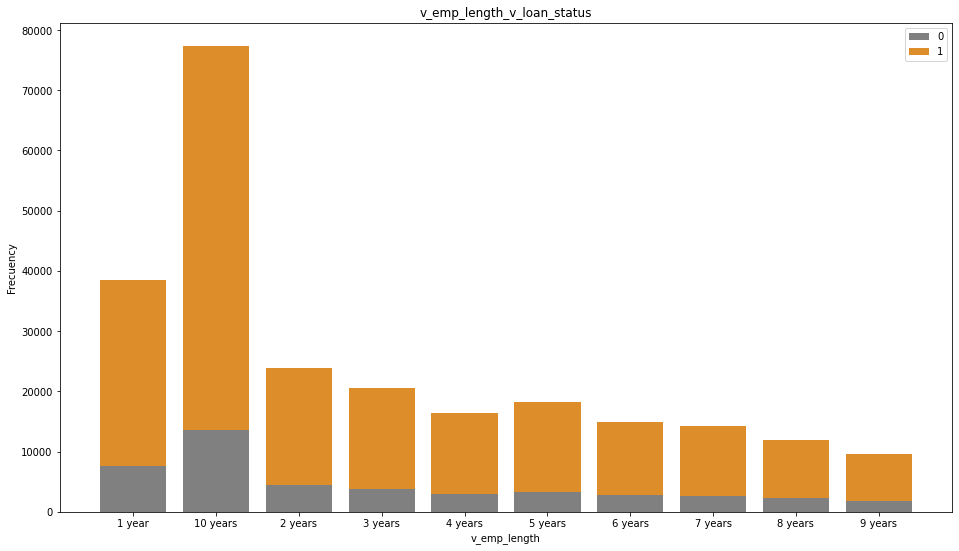

v_application_type


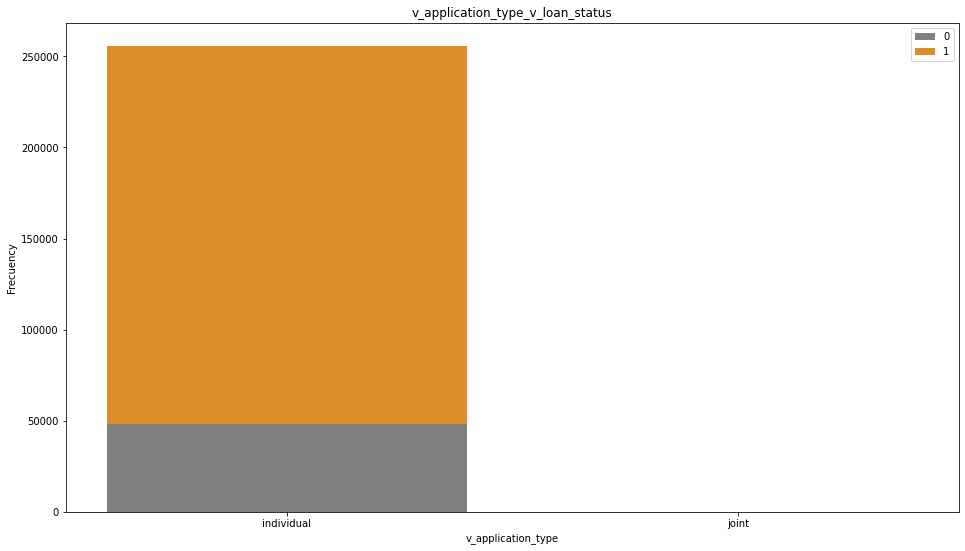

v_term


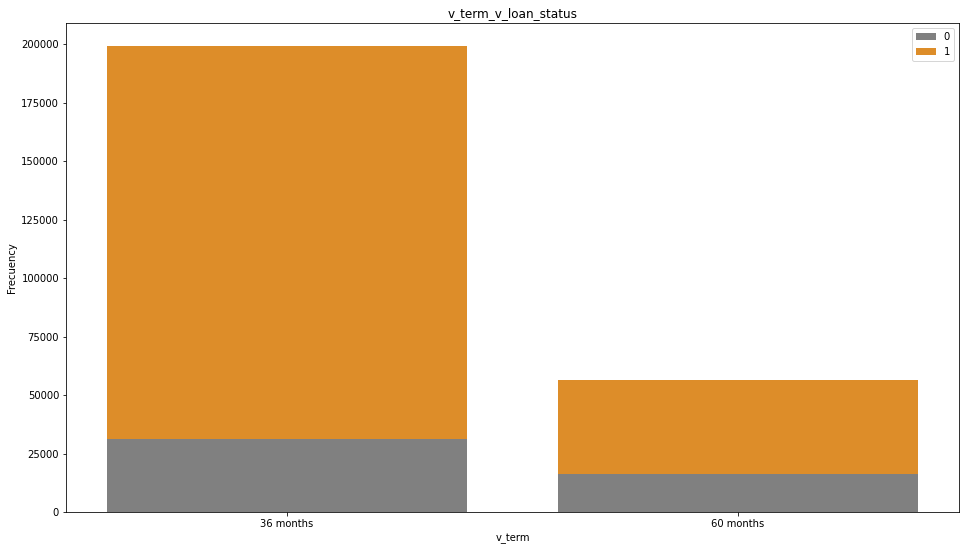

v_grade


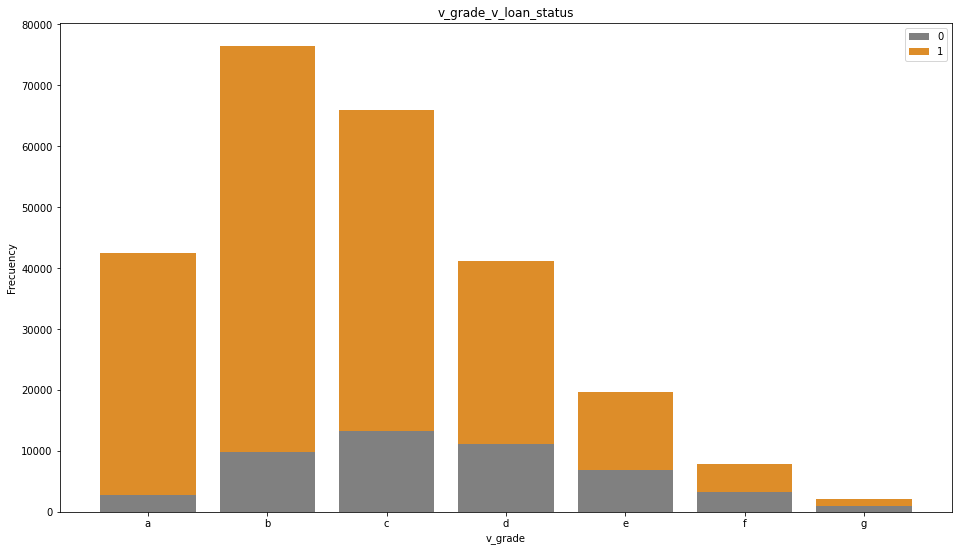

v_sub_grade


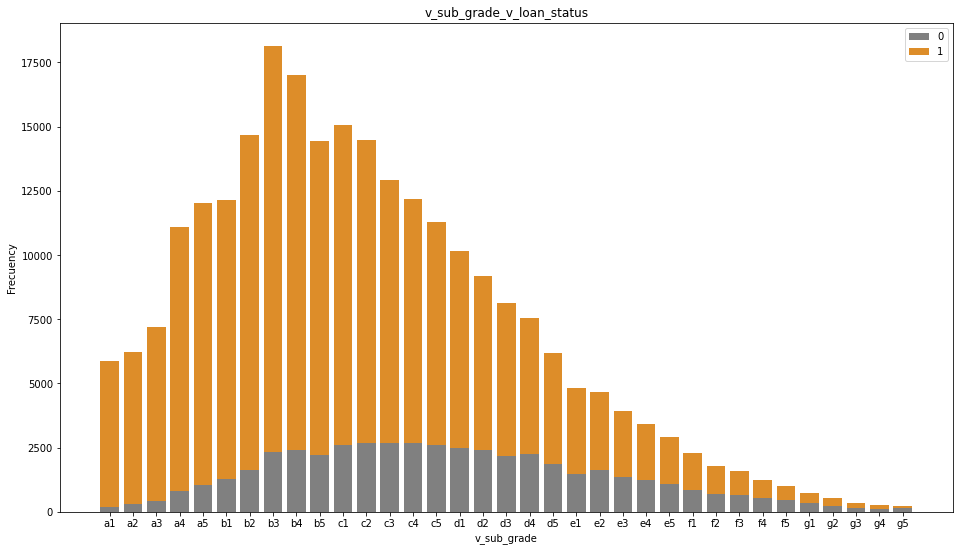

v_home_ownership


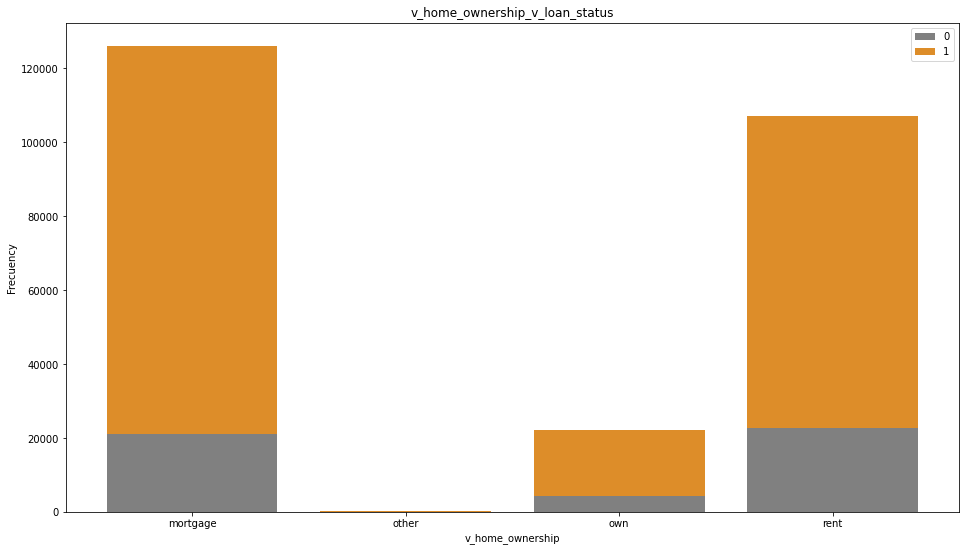

v_verification_status


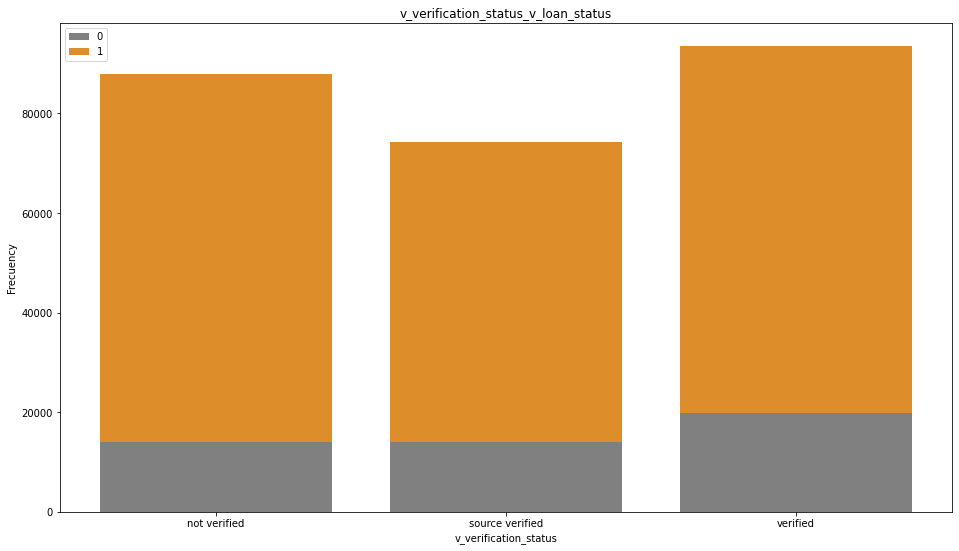

v_purpose


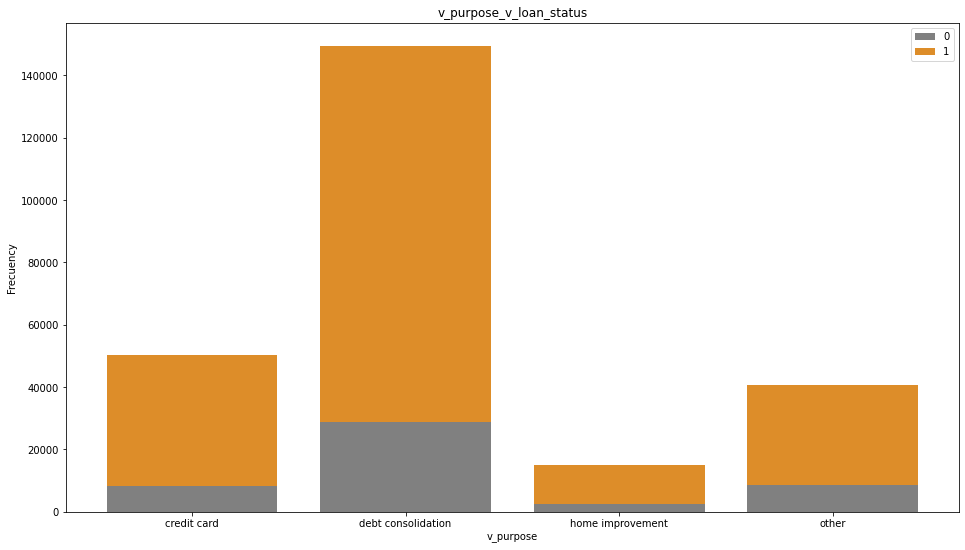

v_addr_state


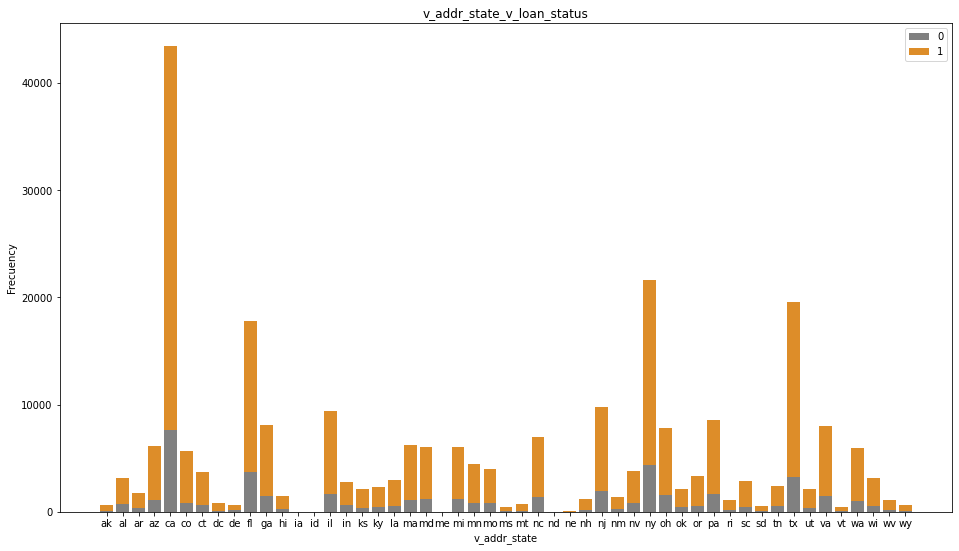

v_initial_list_status


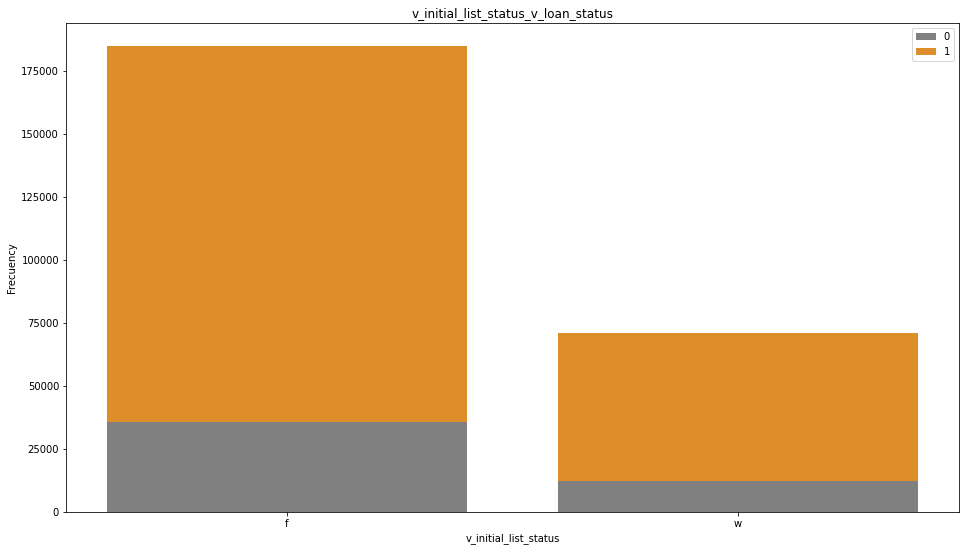

v_pymnt_plan


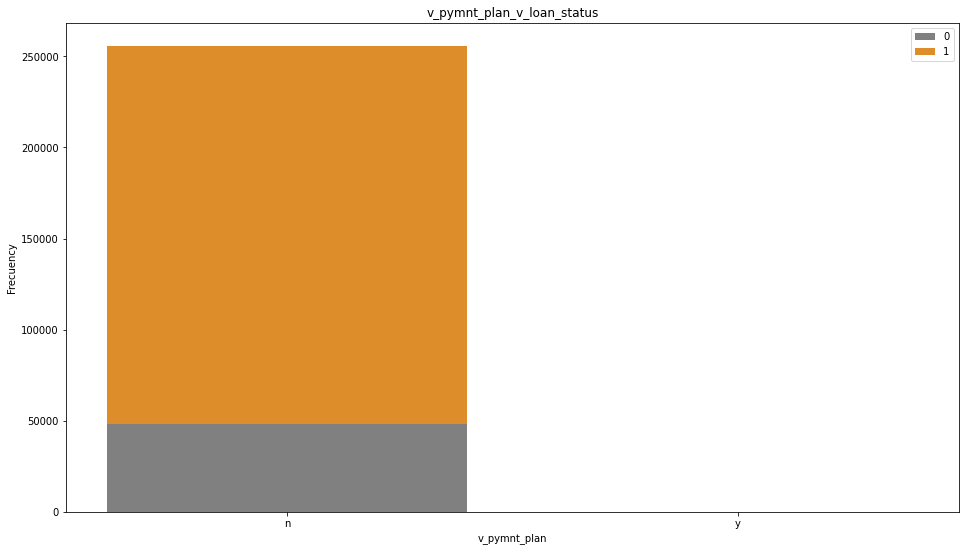

In [ ]:
#Vamos a mostrar mas las primers grafica y abajo vamos a mostrar la información que encontremos
for j in v_variables_new_:
    print(j)
    cross_grafica(df,j,'v_loan_status')

De la gráfica de *v_emp_loan_status...* podemos ver que hay mayor proporción en 10 número de personas, sin embargo, las proporciones parecen mantenerse.
De la gráfica del tipo de *aplicación es individual* donde hay una proporción pequeña de moroso.
De la gráfica de *term_loan_status* podemos ver que hay una mayor cantidad de personas con 36 meses, además podemos ver que en proporción las personas con 60 meses hay más morosos.
De la gráfica de *v_grade* podemos ver a,b,c,d guardan la mayor cantidad de las personas,pero en proporción hay más morosos en c y d comparado con b.
De la gráfica de *sub_grade* al igual que en *grade* la morosidad se concentra en c.
De la gráfica de *home_ownersip* podemos ver que la mayoría de las personas se concentran en mortgage y renta, donde la proporción de morosidad en estos grupos es similar.
De la gráfica de *verficación status* los grupos parecen tener números similares de personas y cantidades similares de morosos.
De la gráfica de *purpose* podemos ver que la mayoría de personas se concentra en debt consolidation, sin embargo, no parece tener un grupo en le cual se concentren mayor cantidad de morosos en proporción al tamaño del grupo.
De la gráfica de *state* podemos ver que los estados con mayor cantidad de personas en el base de datos son California, nueva York y Texas, sin embargo,no parece que algún estado presente mayor proporción de morosidad.
De la gráfica de *initial_list_status* podemos ver que la mayoría es F, sin embargo, no parece tener algún grupo un mayor porcentaje de morosos.
De la gráfica de *pymnt_plan* podemos ver que toda la información se concentra en las personas que no tienen plan, por lo que no podemos sacar mucha información.


In [ ]:
len(c_variables_new)

24

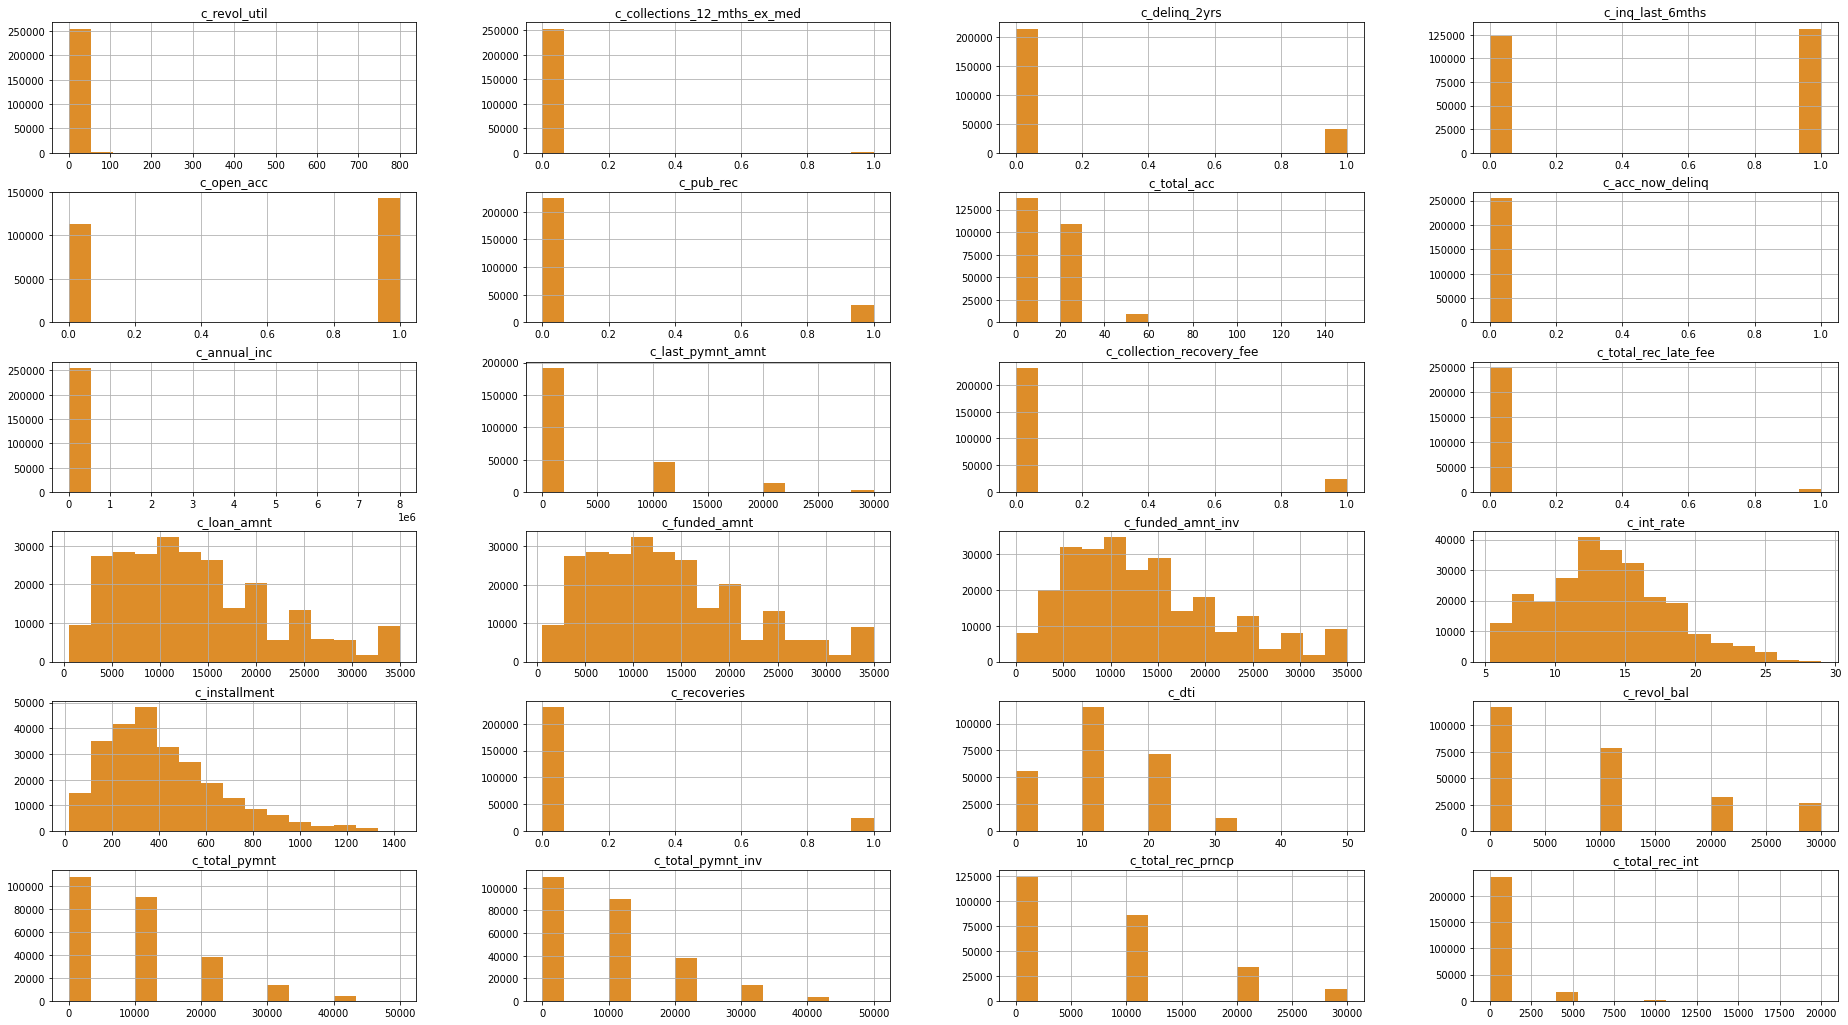

In [ ]:
df[c_variables_new].hist(bins=15, figsize=(32, 18), layout=(6, 4))
plt.show()

De las primeras 18 gráficas vemos que condensamos los primeros valores en dos grupos debido a la naturaleza de estos, mientras que en las siguientes 5 gráficas podemos ver que los valores tienen distribuciones muy similares, esto podría indicarnos que hay cierta correlación entre estas variables y así poder realizar un tratamiento a futuro de reducción de dimensiones, para las últimas gráficas podemos ver que también se segmentan los valores en grupos específicos como pueden ser de intervalos de 10000 unidades, donde en la mayoría de los casos la información se concentra en los primeros valores como por ejemplo en *total_pymnt* donde la mayor cantidad de valores se concentra en el rango de 0 a 10000.

##  Outliers

Para el tratamiento de outliers procederemos a primera instancia utilizar vizualizaciones boxplot cada 10 variables, de esta forma será más facil vizualizarlos y analizarlos.


In [ ]:
# Detectamos que variables son númericas o categoricas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255720 entries, 0 to 887371
Data columns (total 46 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   t_emp_title                   241630 non-null  object 
 1   v_emp_length                  245789 non-null  object 
 2   d_last_pymnt_d                255181 non-null  object 
 3   c_revol_util                  255481 non-null  float64
 4   c_collections_12_mths_ex_med  255575 non-null  float64
 5   c_delinq_2yrs                 255691 non-null  float64
 6   d_earliest_cr_line            255691 non-null  object 
 7   c_inq_last_6mths              255691 non-null  float64
 8   c_open_acc                    255691 non-null  float64
 9   c_pub_rec                     255691 non-null  float64
 10  c_total_acc                   255691 non-null  float64
 11  c_acc_now_delinq              255691 non-null  float64
 12  d_last_credit_pull_d          255697 non-nul

Obtenemos las varibles númericas de nuestra dataset

In [ ]:

# Vamos a dividir las variables númericas y las variables categóricas (object)
numeric_cols = df.select_dtypes(include=['number']).columns

non_numeric_cols = df.select_dtypes(exclude=['number']).columns

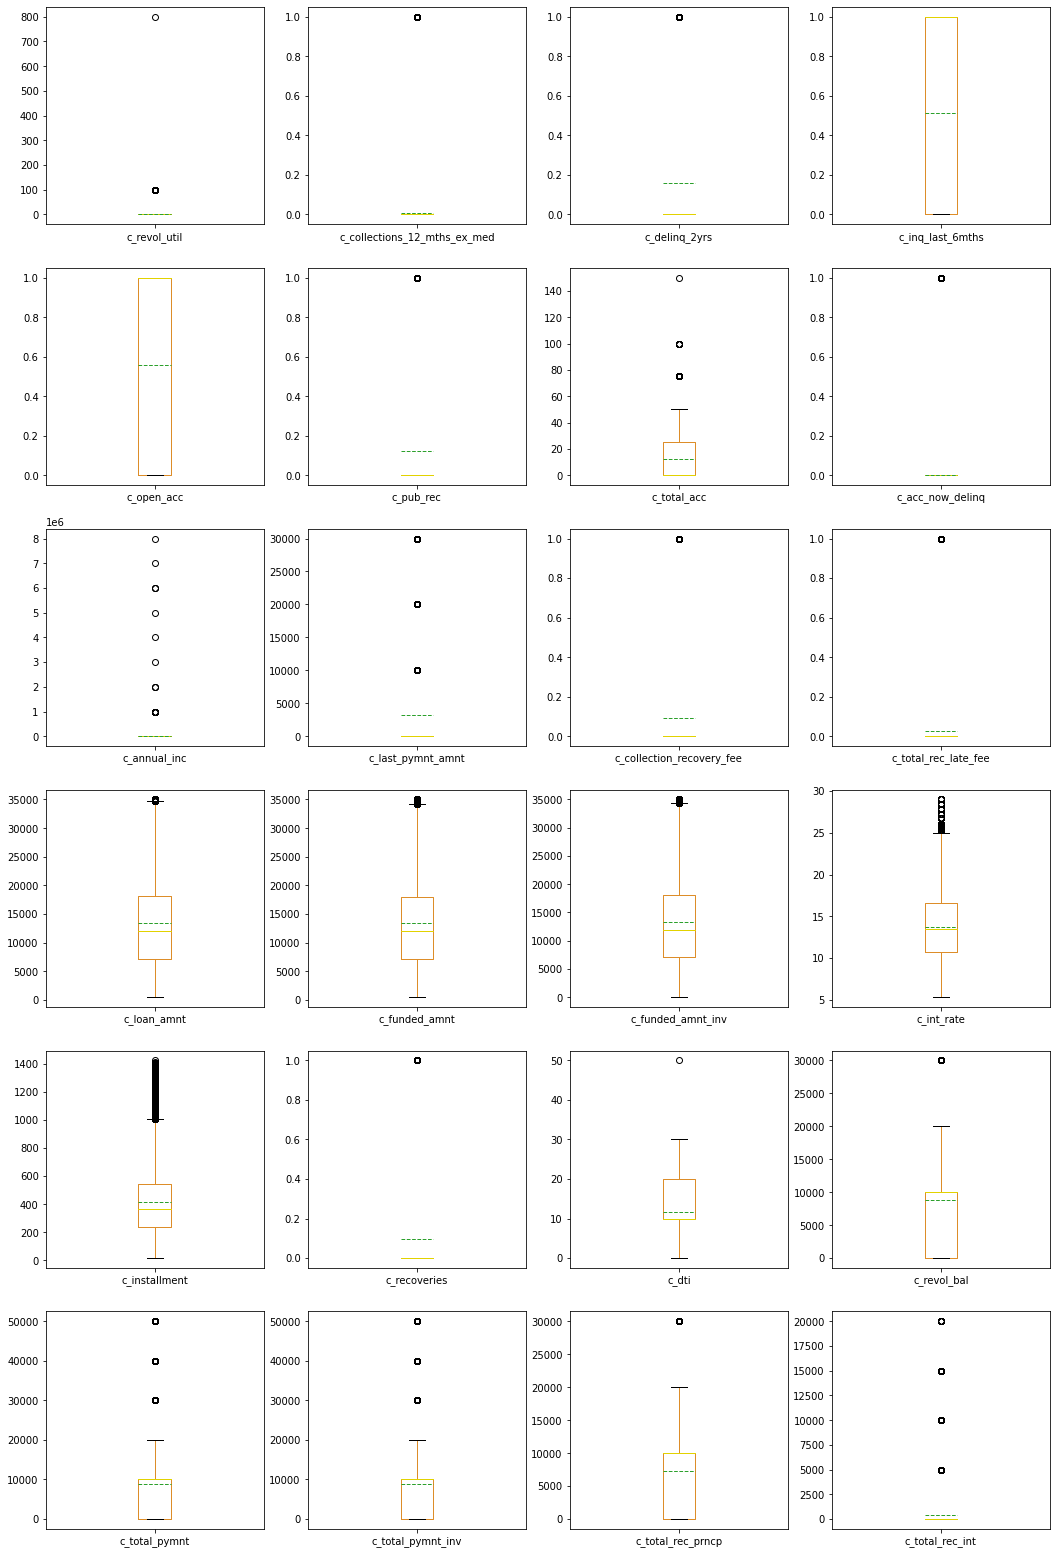

In [ ]:
fig, axs = plt.subplots(6, 4, figsize=(18,28))
# Reajustamos la matriz de axes a una arreglo de axes
axs = axs.flatten()

for col, ax in zip(numeric_cols, axs):
  df[col].plot.box(vert=True, showmeans=True, meanline=True,
                              medianprops={'color': 'C1'}, meanprops={'color': 'tab:green'},
                   ax=ax);

Podemos ver justamente que tenemos varios valores outliers en casi en todas nuestras variables, procederemos a eliminarlos ya podrian sesgar nuestro modelo.

### Eliminacion de outliers

Utilizando el rango intercuartilicos podremos identificar que valores pasan del rango superior e inferior de lo bigotes y les asignaremos nan para posteriormente eliminarlos.

In [ ]:
for x in numeric_cols:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75 - q25
 
    upper = q75 + (1.5*intr_qr)
    lower = q25 - (1.5*intr_qr)
 
    df.loc[df[x] < lower,x] = np.nan
    df.loc[df[x] > upper,x] = np.nan

## Missing
Tomamos las columnas que no tienen 100\% de completitud usando la función `completitud`

In [ ]:
df_comp=completitud(df)
cols_incompletas=df_comp.query('completitud<100').columna.values
print(cols_incompletas)

['c_last_pymnt_amnt' 'c_revol_bal' 'c_recoveries'
 'c_collection_recovery_fee' 'c_total_rec_int' 'c_total_pymnt'
 'c_total_pymnt_inv' 't_emp_title' 'c_total_rec_prncp' 'v_emp_length'
 'c_funded_amnt' 'c_loan_amnt' 'c_funded_amnt_inv' 'c_installment'
 'c_total_rec_late_fee' 'c_int_rate' 'd_last_pymnt_d' 'c_revol_util'
 'c_collections_12_mths_ex_med' 'c_acc_now_delinq' 'c_total_acc'
 'c_delinq_2yrs' 'c_inq_last_6mths' 'c_open_acc' 'c_pub_rec'
 'd_earliest_cr_line' 'd_last_credit_pull_d' 't_title' 'c_annual_inc'
 'c_dti']


In [ ]:
#Generamos el dataset de train y test
df['v_emp_length'] = df['v_emp_length'].str.replace(r'\D', '')
df.dropna()
X_test,X_train=train_test_split(df,train_size=70,stratify=df[["v_loan_status"]],random_state=412)

Para hacer imputación hay que revisar que la distribución de los datos no cambie mucho al hacer la sustitución.

 Para esto se usa la función `input_moda` del archivo de `repaso_calidad_datos.ipynb`.
Dicha función realiza una prueba de bondad de ajuste en la que compara el histograma de la distribución antes de hacer la imputación y después usando la prueba de $\chi^2$. Definimos un intervalo de confianza con parámetro $\alpha=0.05$ y si el $p$-valor es menor a $\alpha$ rechazamos la hipótesis nula de que es una distribución parecida.

Para ver las comparaciones a continuación graficamos los histogramas de la única variable categórica que tenemos, antes y después de hacer la imputación

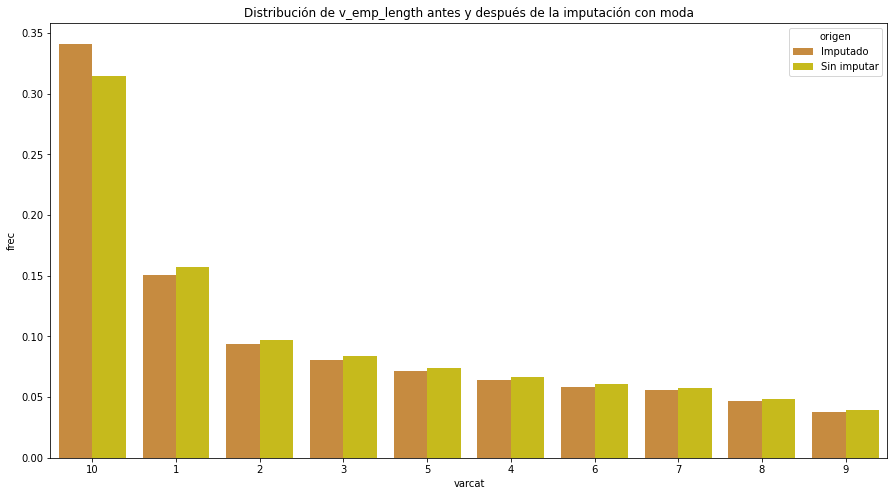

Rechazamos HO(La porporción de categorias es la misma que la general)


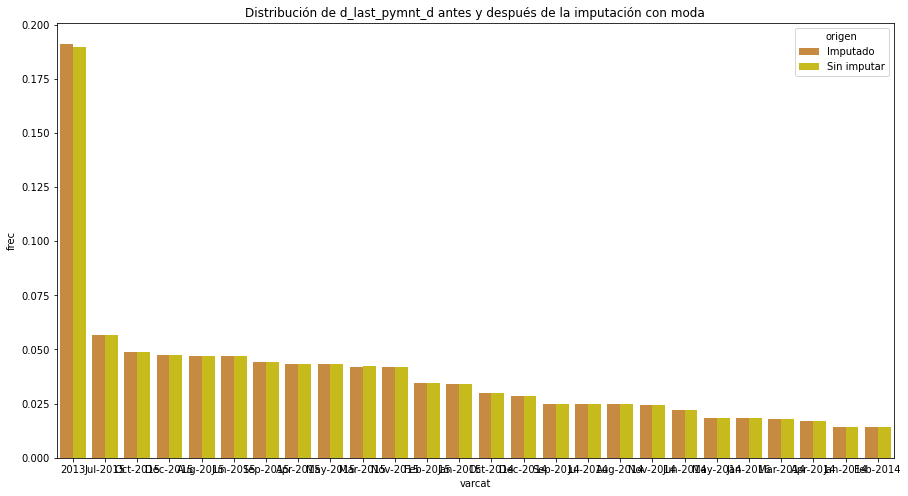

Aceptamos HO(La porporción de categorias es la misma que la general)


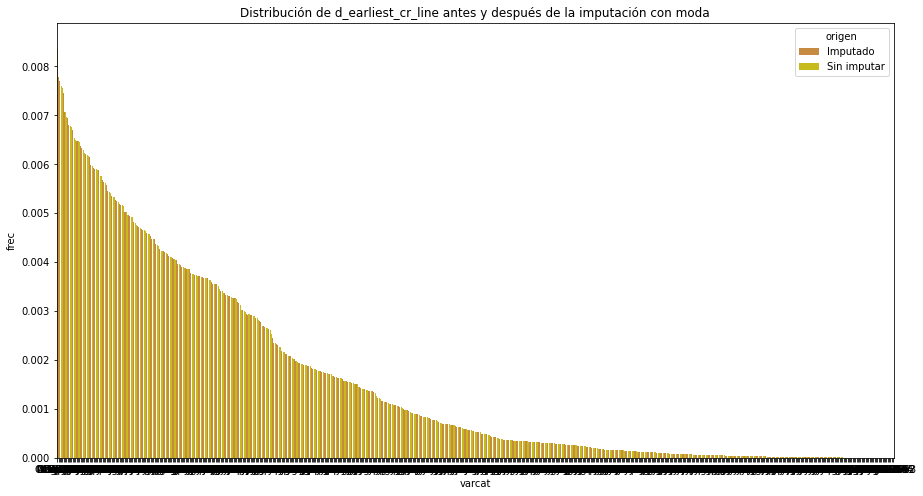

Aceptamos HO(La porporción de categorias es la misma que la general)


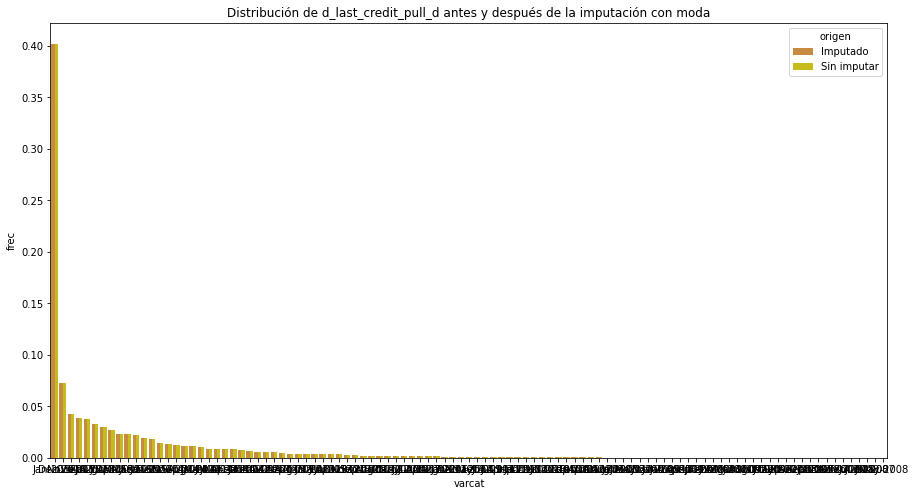

Aceptamos HO(La porporción de categorias es la misma que la general)


In [ ]:
from scipy.stats import chisquare
from scipy import stats

import seaborn as sns
col='d_last_pymnt_d'

def imput_moda(df,col,plot=False):
  mode=df[col].mode()[0]
#Frecuencias observadas después de hacer la imputación con la moda
  x_i=df[col].fillna(mode).value_counts()
  
  k=x_i.sum() # total de muestras
  p_i=df[col].dropna().value_counts(1) # proporción de cada valor categórico

  m_i=k*p_i # Numero esperado de apariciones de cada valor categórico
  
  # Se realiza la prueba de goodness of fit, que compara frecuencias para cada valor de la distribución usando chi^2
  chi=chisquare(f_obs=x_i,f_exp=m_i) # Prueba de chi cuadrada 
  p_val=chi.pvalue
  alpha=0.05

  if plot:
    X_viejo=df[col].value_counts(True)
    moda=df[col].mode()[0]
    X_nuevo=df[col].fillna(moda).value_counts(True)

    df_prov=pd.DataFrame({'varcat':list(X_nuevo.index)+list(X_viejo.index),'frec':list(X_nuevo.values)+list(X_viejo.values),'origen':['Imputado' for i in range(len(X_nuevo))]+['Sin imputar' for i in range(len(X_viejo))]})

    plt.figure(figsize=(15,8))
    sns.barplot(data=df_prov,x='varcat',y='frec',hue='origen')
    plt.title(f'Distribución de {col} antes y después de la imputación con moda')
    plt.show()

  if p_val<alpha:
      print("Rechazamos HO(La porporción de categorias es la misma que la general)")
  else:
      print("Aceptamos HO(La porporción de categorias es la misma que la general)")
  return df[col].replace(np.nan,mode)

for col in ['v_emp_length', 'd_last_pymnt_d' ,'d_earliest_cr_line','d_last_credit_pull_d' ]:
  imput_moda(df,col,True)

Solo se rechazó la prueba para la columna `v_emp_length`, entonces la distribución de esa columna si cambió significativamente, de modo que no podemos hacer esta imputación y debemos eliminar los renglones correspondientes. Para las demás conservamos los valores imputados

In [ ]:
#Quitamos valores nulos
df=df[df['v_emp_length'].notnull()]

# Rellenamos las demás columnas
for col in [ 'd_last_pymnt_d' ,'d_earliest_cr_line','d_last_credit_pull_d' ]:
  df[col]=imput_moda(df,col)

Aceptamos HO(La porporción de categorias es la misma que la general)
Aceptamos HO(La porporción de categorias es la misma que la general)
Aceptamos HO(La porporción de categorias es la misma que la general)


## Variables numéricas

Para las variables numéricas probamos con tres diferentes medidas:
- moda
- media
- mediana

Después, siguiendo el caso categórico hacemos la prueba de bondad de ajuste (de Kolmogorov-Smirnov) para ver cuál regresa un valor p-mayor. Esta será la distribución que menos cambió y podemos imputar los valores con esa medida.

In [ ]:
from sklearn.impute import SimpleImputer

def c_imput(df,col):
   mean=df[col].mean()
   median=df[col].median()
   mode=df[col].mode()[0]   

   originales_mean=list(df[col].dropna().values)
   imputados_mean=list(df[col].fillna(mean).values)
   s_1=stats.ks_2samp(originales_mean,imputados_mean)
   statistic_1=s_1[0]
   pvalue_1=s_1[1]

   originales_median=list(df[col].dropna().values)
   imputados_median=list(df[col].fillna(median).values)
   s_2=stats.ks_2samp(originales_median,imputados_median)
   statistic_2=s_2[0]
   pvalue_2=s_2[1]

   
   originales_mode=list(df[col].dropna().values)
   imputados_mode=list(df[col].fillna(mode).values)
   s_3=stats.ks_2samp(originales_mode,imputados_mode)
   statistic_3= s_3[0]
   pvalue_3=s_3[1]
   
   ## metodo| p-value | estadistico
   # initialize list of lists
   datos = [['mean', pvalue_1,statistic_1], ['median', pvalue_2,statistic_2], ['mode', pvalue_3,statistic_3],]
 
   # Create the pandas DataFrame
   final_tableu = pd.DataFrame(datos, columns = ['Method', 'p-value','statistic'])

   how=final_tableu.iloc[final_tableu['p-value'].idxmax()]['Method']
   imp=SimpleImputer(missing_values=np.nan,strategy=how)
   imp.fit(df[[col]])
   df[[col]]=imp.transform(df[[col]])
   df[[col]]=imp.transform(df[[col]])

   print('col')
   print(how)
   print(final_tableu)

cols_num_incomp=[  'c_revol_util',
 'c_collections_12_mths_ex_med', 'c_delinq_2yrs', 
 'c_inq_last_6mths', 'c_open_acc', 'c_pub_rec', 'c_total_acc',
 'c_acc_now_delinq',  'c_annual_inc']

# Basta iterar sobre las columnas numéricas porque dentro de la función c_imput ya cambiamos el df
for col in cols_num_incomp:
   c_imput(df,col)

col
median
   Method   p-value  statistic
0    mean  0.999914   0.000937
1  median  1.000000   0.000002
2    mode  1.000000   0.000002
col
median
   Method  p-value  statistic
0    mean      1.0   0.000586
1  median      1.0   0.000004
2    mode      1.0   0.000004
col
mean
   Method  p-value  statistic
0    mean      1.0   0.000099
1  median      1.0   0.000019
2    mode      1.0   0.000019
col
mean
   Method  p-value  statistic
0    mean      1.0   0.000061
1  median      1.0   0.000057
2    mode      1.0   0.000057
col
mean
   Method  p-value  statistic
0    mean      1.0   0.000066
1  median      1.0   0.000052
2    mode      1.0   0.000052
col
mean
   Method  p-value  statistic
0    mean      1.0   0.000104
1  median      1.0   0.000014
2    mode      1.0   0.000014
col
mean
   Method  p-value  statistic
0    mean      1.0   0.000063
1  median      1.0   0.000055
2    mode      1.0   0.000055
col
mean
   Method  p-value     statistic
0    mean      1.0  1.176499e-04
1  median     

In [ ]:
completitud(df)[:3]

,columna,total,completitud
0,c_last_pymnt_amnt,62100,74.734427
1,c_revol_bal,25848,89.483663
2,c_recoveries,23585,90.404371


Así sólo hace falta ver que hacer con los datos faltantes de texto, a continuación visualizamos las columnas

In [ ]:
df[['t_emp_title','t_title']].sample(15)

,t_emp_title,t_title
208741,US Bank,Responsible.Employed.Re-paid.
133349,Access Case Management,Card Consolidation
46614,NaN,windows
111548,Meridian Title Corporation,3 Years to Debt Free
196183,rockland psychiatric center,mygoal
859351,FIRE INSPECTOR,Debt consolidation
228418,Lakeshore Family Care,Debt Consolidation
212274,"DMS, Inc.",Debt repay
208294,Lockheed Martin Corporation,Other
67011,Finance Manager,Refinance Loan


Tomando en cuenta que `t_title` es el título proporcionado por el prestatario y  `t_emp_title` es el título del empleo del prestatario.
Ambos tienen muy alto porcentaje de valores únicos por lo que la imputación por moda no parece correcta. Parecería correcto quitar las columnas porque no tienen mucho contenido que nos ayude a predecir. También se podría hacer procesamiento de lenguaje natural para obtener información como seleccionar todos los que mencionan la palabra `Debt`, pero no se nos ocurrió como así que quitamos las columnas

In [ ]:
cols_sin_texto=[col for col in df.columns]
cols_sin_texto.remove('t_title')
cols_sin_texto.remove('t_emp_title')

df=df[cols_sin_texto]

## Ingeniería de variables

In [ ]:
X_train.head()


,t_emp_title,v_emp_length,d_last_pymnt_d,c_revol_util,c_collections_12_mths_ex_med,c_delinq_2yrs,d_earliest_cr_line,c_inq_last_6mths,c_open_acc,c_pub_rec,c_total_acc,c_acc_now_delinq,d_last_credit_pull_d,t_title,c_annual_inc,v_application_type,c_last_pymnt_amnt,c_collection_recovery_fee,v_id,c_total_rec_late_fee,v_member_id,c_loan_amnt,c_funded_amnt,c_funded_amnt_inv,v_term,c_int_rate,c_installment,v_grade,v_sub_grade,v_home_ownership,v_verification_status,d_issue_d,c_recoveries,v_loan_status,t_url,v_purpose,v_zip_code,v_addr_state,c_dti,c_revol_bal,v_initial_list_status,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,v_pymnt_plan
205169,iKanSoftware,8,2013,0.0,0.0,0.0,Apr-1995,1.0,1.0,0.0,0.0,0.0,Nov-2013,Pay It Down,0.0,individual,0.0,0.0,1449410,0.0,1702159,6000.0,6000.0,6000.0,36 months,16.29,211.81,c,c4,mortgage,not verified,Aug-2012,0.0,fully paid,https://www.lendingclub.com/browse/loanDetail....,debt consolidation,773xx,tx,10.0,0.0,f,0.0,0.0,0.0,0.0,n
425577,Service Manager,9,Jul-2015,0.0,0.0,0.0,Dec-1996,1.0,1.0,1.0,25.0,0.0,Jul-2015,Debt consolidation,0.0,individual,NaN,0.0,12936181,0.0,14968379,22000.0,22000.0,22000.0,36 months,14.16,753.62,c,c2,mortgage,verified,Mar-2014,0.0,fully paid,https://www.lendingclub.com/browse/loanDetail....,debt consolidation,983xx,wa,10.0,0.0,f,20000.0,20000.0,20000.0,0.0,n
433229,IT Specialist,10,Sep-2014,0.0,0.0,0.0,Aug-1989,1.0,1.0,0.0,50.0,0.0,Jan-2016,Credit card refinancing,0.0,individual,0.0,0.0,12428210,0.0,14440322,9600.0,9600.0,9600.0,36 months,11.99,318.82,b,b3,mortgage,source verified,Mar-2014,0.0,fully paid,https://www.lendingclub.com/browse/loanDetail....,credit card,840xx,ut,20.0,10000.0,f,10000.0,10000.0,0.0,0.0,n
16530,NaN,NaN,May-2014,0.0,0.0,0.0,May-1986,0.0,0.0,0.0,25.0,0.0,May-2014,Bike,0.0,individual,0.0,0.0,715721,0.0,909400,7200.0,7200.0,7200.0,36 months,5.42,217.16,a,a1,mortgage,not verified,Apr-2011,0.0,fully paid,https://www.lendingclub.com/browse/loanDetail....,other,301xx,ga,10.0,10000.0,f,0.0,0.0,0.0,0.0,n
204758,williamsfield unit school dist 210,10,2013,0.0,0.0,0.0,Mar-1992,1.0,1.0,0.0,25.0,0.0,Dec-2015,debt consolidation,0.0,individual,NaN,0.0,1448462,0.0,1700948,15075.0,15075.0,15075.0,36 months,10.16,487.57,b,b1,mortgage,not verified,Aug-2012,0.0,fully paid,https://www.lendingclub.com/browse/loanDetail....,debt consolidation,614xx,il,20.0,0.0,f,10000.0,10000.0,10000.0,0.0,n


## Reducción de variables

<AxesSubplot:>

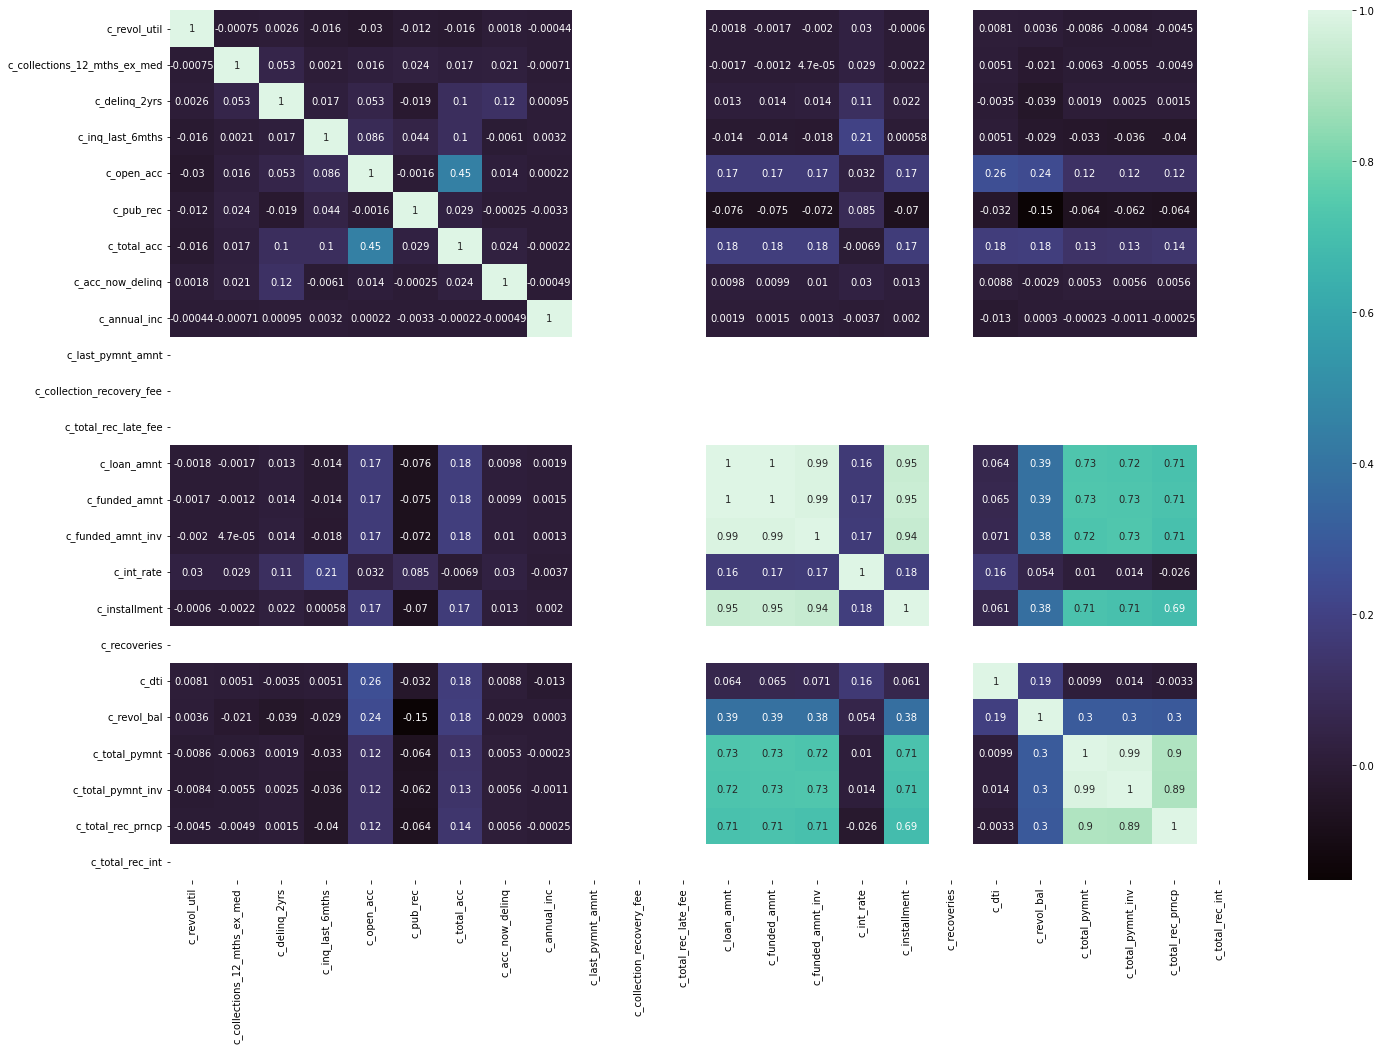

In [ ]:
### GRAFICAS ###


plt.figure(figsize=(24, 16))
sns.heatmap(df.corr(), annot=True,cmap='mako')

Aquí notamos que hay varias columnas que estan altamente correlacionadas entre si, por lo que podemos eliminar algunas de ellas y solo dejar una, ejemplos de estas columnas son: "c_loan_amnt", "c_funded_amnt_inv" y "c_funded_amnt"

In [ ]:
df=df.drop(['c_funded_amnt', 'c_funded_amnt_inv','c_total_pymnt_inv','c_total_rec_prncp'], axis=1)
df=df.drop(['c_recoveries', 'c_installment'], axis=1)

<AxesSubplot:>

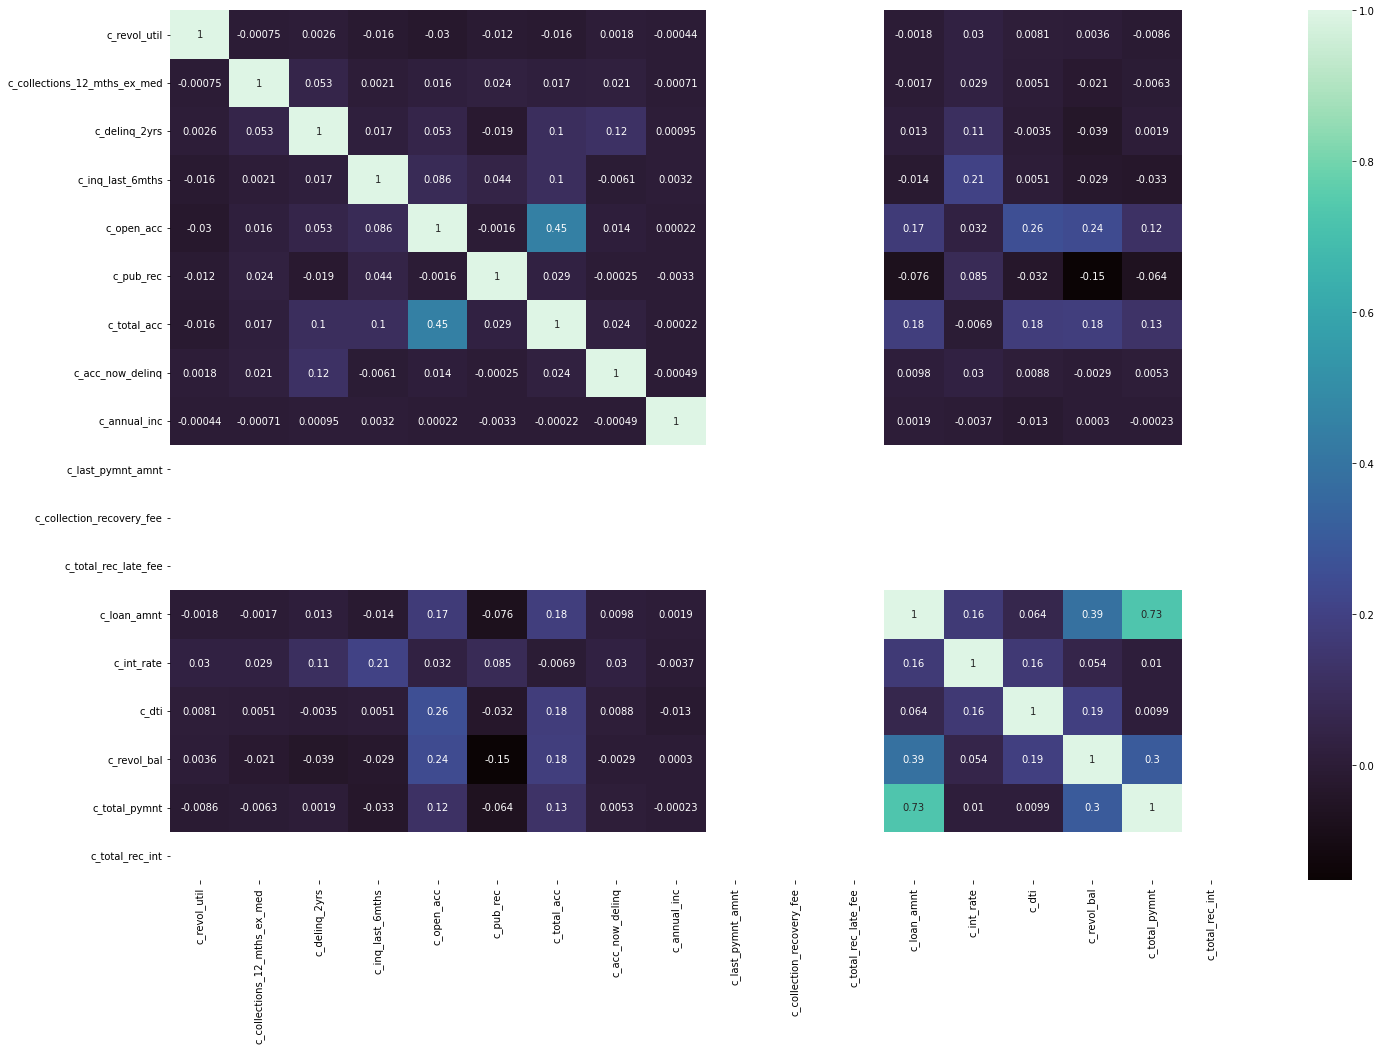

In [ ]:

plt.figure(figsize=(24, 16))
sns.heatmap(df.corr(), annot=True,cmap='mako')

## Categóricas

In [ ]:
#Multicolinealidad Categoricas
def multicolinealidad_cate(df,y,threshold=5,only_final_vif=False):
    '''
    Función para calcular el VIF Genralizado, (GVIF, Fox and Monette 1992)
    Las variables no deben de deben de estar transformadas con OneHotEncoder ya que la función lo realiza internamnete.
    Args:
        df
        y
        threshold
        only_final_vif
    
    Returns:
        pandas data frame: a data frame, indexed by factor of the GVIF, GVIF^(1/2Df), VIF^(1/2Df)^2 
    '''

    df_x = df.drop(y,axis=1)
    #Guardamos los nombres de las columnas añadiendo el prefijo

    onehot_list = list(df_x.select_dtypes(include=['category', 'object', 'string']).columns)
    #Generamos las variables dummy 
    
    df_1hot = pd.get_dummies(df_x, drop_first=True, dummy_na=False, prefix_sep='_')


    #Dataframe vacio para guardar los resultados
    gvif_df = pd.DataFrame(columns = ['factor','GVIF','Df','GVIF^(1/2Df)', 'VIF'])

    # Iteramos sobre las columas
    for (columnName, columnData) in df_x.iteritems():
        #Si se generaron las de una columna, es decir la variable tiene más de dos posibilidades utilizamos todas las variables creadas
        
        if columnName in onehot_list:
            X1 = df_1hot.loc[:, df_1hot.columns.str.startswith(columnName)]
            X2 = df_1hot.loc[:, ~df_1hot.columns.str.startswith(columnName)]
        else:
            X1 = df_1hot[[columnName]].values
            X2 = df_1hot.loc[:, df_1hot.columns != columnName].values
        #display(X1)
        # Calculamose gvif
        #A la matriz de correlación de las variables codificadas en caliente del atributo en consideración.
        #B la matriz de correlación de todos los demás atributos del conjunto de datos (uno codificado en dummy y numérico) excluyendo los de A.
        #C la matriz de correlación de las variables consideradas tanto en A como en B.
        #GVIF= (det(A)*det(B))/det(C)
        #display(np.corrcoef(X1, rowvar=False))
        gvif = np.linalg.det(np.array(np.corrcoef(X1, rowvar=False), ndmin=2)) * np.linalg.det(np.corrcoef(X2, rowvar=False)) / np.linalg.det(np.corrcoef(np.append(X1, X2, axis=1), rowvar=False))
        #(GVIF) elevado a (1 / (2 * grados de libertad))
        #Los grados de libertad es 1-n (n=Número de opciones que tiene la variable categorica)
        gvif_12df = np.power(gvif, 1 / (2 * X1.shape[1]))
        gvif_12df_sq = gvif_12df ** 2
        DF =  X1.shape[1]
    

        # 
        new_row = {'factor': columnName, 'GVIF': gvif,'Df':DF, 'GVIF^(1/2Df)': gvif_12df, 'VIF': gvif_12df_sq}
        gvif_df = gvif_df.append(new_row, ignore_index=True)

    gvif_df = gvif_df.set_index('factor')
    if only_final_vif:
        gvif_df_final = gvif_df.drop(['GVIF','Df','GVIF^(1/2Df)'],axis=1)
    else:
        gvif_df_final = gvif_df 
    gvif_filter = gvif_df.loc[gvif_df['VIF'] >= threshold]['VIF'].to_dict()
    if gvif_filter:
        for i in gvif_filter.keys():
            df_x_m = df_x.drop([i],axis=1)
    else:
        df_x_m = df_x
    df_m=pd.concat([df_x_m,df[y]],axis=1)
    return gvif_df_final

In [ ]:
#No lo corre por tantas variables, mata al kernel
'''
v_feats=list(df.filter(like="v_").columns)
resultados=multicolinealidad_cate(df=df[v_feats+["v_loan_status"]],y="v_loan_status")
'''

'\nv_feats=list(df.filter(like="v_").columns)\nresultados=multicolinealidad_cate(df=df[v_feats+["v_loan_status"]],y="v_loan_status")\n'

## Tratamiento 1


In [ ]:
tratamiento_1 = df.copy()
tratamiento_1.head()

,v_emp_length,d_last_pymnt_d,c_revol_util,c_collections_12_mths_ex_med,c_delinq_2yrs,d_earliest_cr_line,c_inq_last_6mths,c_open_acc,c_pub_rec,c_total_acc,c_acc_now_delinq,d_last_credit_pull_d,c_annual_inc,v_application_type,c_last_pymnt_amnt,c_collection_recovery_fee,v_id,c_total_rec_late_fee,v_member_id,c_loan_amnt,v_term,c_int_rate,v_grade,v_sub_grade,v_home_ownership,v_verification_status,d_issue_d,v_loan_status,t_url,v_purpose,v_zip_code,v_addr_state,c_dti,c_revol_bal,v_initial_list_status,c_total_pymnt,c_total_rec_int,v_pymnt_plan
0,10,Jan-2015,0.0,0.0,0.0,Jan-1985,1.0,0.0,0.0,0.0,0.0,Jan-2016,0.0,individual,0.0,0.0,1077501,0.0,1296599,5000.0,36 months,10.65,b,b2,rent,verified,Dec-2011,fully paid,https://www.lendingclub.com/browse/loanDetail....,credit card,860xx,az,20.0,10000.0,f,0.0,0.0,n
1,1,2013,0.0,0.0,0.0,Apr-1999,1.0,0.0,0.0,0.0,0.0,Sep-2013,0.0,individual,0.0,NaN,1077430,0.0,1314167,2500.0,60 months,15.27,c,c4,rent,source verified,Dec-2011,charged off,https://www.lendingclub.com/browse/loanDetail....,other,309xx,ga,0.0,0.0,f,0.0,0.0,n
2,10,Jun-2014,0.0,0.0,0.0,Nov-2001,1.0,0.0,0.0,0.0,0.0,Jan-2016,0.0,individual,0.0,0.0,1077175,0.0,1313524,2400.0,36 months,15.96,c,c5,rent,not verified,Dec-2011,fully paid,https://www.lendingclub.com/browse/loanDetail....,other,606xx,il,0.0,0.0,f,0.0,0.0,n
3,10,Jan-2015,0.0,0.0,0.0,Feb-1996,1.0,1.0,0.0,25.0,0.0,Jan-2015,0.0,individual,0.0,0.0,1076863,NaN,1277178,10000.0,36 months,13.49,c,c1,rent,source verified,Dec-2011,fully paid,https://www.lendingclub.com/browse/loanDetail....,other,917xx,ca,20.0,0.0,f,10000.0,0.0,n
5,3,Jan-2015,0.0,0.0,0.0,Nov-2004,1.0,0.0,0.0,0.0,0.0,Sep-2015,0.0,individual,0.0,0.0,1075269,0.0,1311441,5000.0,36 months,7.90,a,a4,rent,source verified,Dec-2011,fully paid,https://www.lendingclub.com/browse/loanDetail....,other,852xx,az,10.0,0.0,f,0.0,0.0,n


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
df_lof=tratamiento_1.filter(like="c_").dropna()
#parametros del modelo
#contamination :La cantidad de contaminación del conjunto de datos, es decir, la proporción
#de valores atípicos en el conjunto de datos. Al ajustar esto se utiliza para definir el
#umbral en las puntuaciones de las muestras.
model = LocalOutlierFactor(n_neighbors= 6, metric = "euclidean", contamination = 0.02)
y_pred = model.fit_predict(df_lof)

In [ ]:
df_lof["outlier"]=y_pred

In [ ]:
df_lof["outlier"].value_counts(1) #Observamos el porcentaje aproximado que eliminaremos

 1    0.979993
-1    0.020007
Name: outlier, dtype: float64

In [ ]:
outlier_index = np.where(y_pred <=-1) # los valores negativos son valores atípicos
outlier_values = df_lof.iloc[outlier_index]

In [ ]:
df=tratamiento_1.loc[[x for x in df.index if x not in list(outlier_index[0])]]


In [ ]:
print("Porcentaje sin outliers:", df.shape[0]/255720, "\n")

Porcentaje sin outliers: 0.9535976849679336 



## Tratamiento 2

In [ ]:
tratamiento_2 = df.copy() # Tabla limpia

In [ ]:
pd.DataFrame(round(tratamiento_2.var(), 2), columns = ['Varianza'])

,Varianza
c_revol_util,2.737000e+01
c_collections_12_mths_ex_med,1.000000e-02
c_delinq_2yrs,1.400000e-01
c_inq_last_6mths,2.500000e-01
c_open_acc,2.500000e-01
c_pub_rec,1.000000e-01
c_total_acc,2.044900e+02
c_acc_now_delinq,0.000000e+00
c_annual_inc,1.279352e+09
c_last_pymnt_amnt,0.000000e+00


In [ ]:
X = tratamiento_2
y = tratamiento_2[["v_loan_status"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 12, test_size = .3)

In [ ]:
X_train.head()



,v_emp_length,d_last_pymnt_d,c_revol_util,c_collections_12_mths_ex_med,c_delinq_2yrs,d_earliest_cr_line,c_inq_last_6mths,c_open_acc,c_pub_rec,c_total_acc,c_acc_now_delinq,d_last_credit_pull_d,c_annual_inc,v_application_type,c_last_pymnt_amnt,c_collection_recovery_fee,v_id,c_total_rec_late_fee,v_member_id,c_loan_amnt,v_term,c_int_rate,v_grade,v_sub_grade,v_home_ownership,v_verification_status,d_issue_d,v_loan_status,t_url,v_purpose,v_zip_code,v_addr_state,c_dti,c_revol_bal,v_initial_list_status,c_total_pymnt,c_total_rec_int,v_pymnt_plan,v_revol_util,v_collections_12_mths_ex_med,v_delinq_2yrs,v_inq_last_6mths,v_open_acc,v_pub_rec,v_total_acc,v_acc_now_delinq,v_annual_inc,v_last_pymnt_amnt,v_collection_recovery_fee,v_total_rec_late_fee,v_int_rate,v_dti,v_revol_bal,v_total_pymnt,v_total_rec_int
392640,2,Sep-2015,0.0,0.0,0.0,Sep-2001,0.0,1.0,0.0,0.0,0.0,Oct-2015,0.0,individual,0.0,0.0,16240955,0.0,18343453,4875.0,36 months,12.99,c,c1,mortgage,not verified,May-2014,fully paid,https://www.lendingclub.com/browse/loanDetail....,other,850xx,az,10.0,20000.0,f,0.0,0.0,n,"(-0.1, 50.0]","(-0.001, 0.5]","(-0.001, 0.333]","(-0.001, 0.333]","(0.667, 1.0]","(-0.001, 0.333]","(-0.1, 50.0]","(-0.001, 0.5]","(-7000.0, 3500000.0]","(-0.001, 0.0]","(-0.001, 0.0]","(-0.001, 0.0]","(11.877, 15.155]","(-0.03, 10.0]","(15000.0, 20000.0]","(-20.0, 5000.0]","(-0.001, 0.0]"
12703,8,2013,0.0,0.0,0.0,Apr-1987,1.0,1.0,0.0,25.0,0.0,Jan-2016,0.0,individual,0.0,0.0,794020,0.0,998593,25000.0,60 months,13.49,c,c2,mortgage,source verified,Jul-2011,charged off,https://www.lendingclub.com/browse/loanDetail....,other,140xx,ny,0.0,20000.0,f,10000.0,0.0,n,"(-0.1, 50.0]","(-0.001, 0.5]","(-0.001, 0.333]","(0.667, 1.0]","(0.667, 1.0]","(-0.001, 0.333]","(-0.1, 50.0]","(-0.001, 0.5]","(-7000.0, 3500000.0]","(-0.001, 0.0]","(-0.001, 0.0]","(-0.001, 0.0]","(11.877, 15.155]","(-0.03, 10.0]","(15000.0, 20000.0]","(5000.0, 10000.0]","(-0.001, 0.0]"
158577,10,Aug-2015,0.0,0.0,0.0,Aug-2003,0.0,0.0,0.0,25.0,0.0,Sep-2015,0.0,individual,0.0,0.0,3641812,0.0,4594547,20800.0,36 months,8.90,a,a5,rent,not verified,Mar-2013,fully paid,https://www.lendingclub.com/browse/loanDetail....,debt consolidation,902xx,ca,10.0,20000.0,f,20000.0,0.0,n,"(-0.1, 50.0]","(-0.001, 0.5]","(-0.001, 0.333]","(-0.001, 0.333]","(-0.001, 0.333]","(-0.001, 0.333]","(-0.1, 50.0]","(-0.001, 0.5]","(-7000.0, 3500000.0]","(-0.001, 0.0]","(-0.001, 0.0]","(-0.001, 0.0]","(8.598, 11.877]","(-0.03, 10.0]","(15000.0, 20000.0]","(15000.0, 20000.0]","(-0.001, 0.0]"
71628,2,Nov-2014,0.0,0.0,0.0,Jun-1990,0.0,0.0,1.0,25.0,0.0,Nov-2014,0.0,individual,0.0,0.0,8376477,0.0,10118520,6250.0,36 months,13.67,b,b5,own,source verified,Oct-2013,fully paid,https://www.lendingclub.com/browse/loanDetail....,debt consolidation,973xx,or,20.0,0.0,w,0.0,0.0,n,"(-0.1, 50.0]","(-0.001, 0.5]","(-0.001, 0.333]","(-0.001, 0.333]","(-0.001, 0.333]","(0.667, 1.0]","(-0.1, 50.0]","(-0.001, 0.5]","(-7000.0, 3500000.0]","(-0.001, 0.0]","(-0.001, 0.0]","(-0.001, 0.0]","(11.877, 15.155]","(10.0, 20.0]","(-20.0, 5000.0]","(-20.0, 5000.0]","(-0.001, 0.0]"
219607,10,Jul-2014,0.0,0.0,0.0,Jul-2002,1.0,0.0,0.0,0.0,0.0,Jan-2016,0.0,individual,0.0,0.0,1249565,0.0,1492187,17000.0,36 months,18.55,d,d4,mortgage,source verified,Apr-2012,fully paid,https://www.lendingclub.com/browse/loanDetail....,debt consolidation,809xx,co,10.0,0.0,f,20000.0,0.0,n,"(-0.1, 50.0]","(-0.001, 0.5]","(-0.001, 0.333]","(0.667, 1.0]","(-0.001, 0.333]","(-0.001, 0.333]","(-0.1, 50.0]","(-0.001, 0.5]","(-7000.0, 3500000.0]","(-0.001, 0.0]","(-0.001, 0.0]","(-0.001, 0.0]","(18.433, 21.712]","(-0.03, 10.0]","(-20.0, 5000.0]","(15000.0, 20000.0]","(-0.001, 0.0]"


In [ ]:
cols = list(X_train.drop(columns=['v_loan_status', 'v_emp_length', 'c_loan_amnt']).columns)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a11965cb-82ce-4b81-b371-97bc2b3657d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>